# Scratch Detection Assignment
Scratch Detection Assignment for a student position in the data science team at NI

<img src="assets/NI_logo.png" width="100" height="100">
Before you start working on this assignment, make sure you meet the prerequisites below: <a href="https://pef.fa.us1.oraclecloud.com/hcmUI/CandidateExperience/en/sites/CX/job/4998">Machine Learning Engineer Student Job Description</a>

**Main mandatory requirements:**

- Studying for M.Sc/B.Sc in Computer Science or related technical discipline( M.Sc is a big advantage)
- Remaining studies of at least one and a half years.
- Availability for 3-4 working days a week.
- Located in Israel

## Introduction:

In the semiconductor industry, **"wafers"** are thin discs of semiconductor material, such as silicon, used to fabricate microelectronic devices such as transistors, integrated circuits, and other components. A single wafer can contain hundreds or thousands of individual devices, known as **"dies"**, which are typically cut or "diced" from the wafer after the manufacturing process is completed.

You can read more about semiconductor here: <a href="https://www.amd.com/en/technologies/introduction-to-semiconductors//">Introduction to Semiconductors</a>

<figure>
  <img src="assets/wafer.jpeg" width="350" height="280">
  <figcaption>Fig.1 - An example of a standard wafer</figcaption>
</figure>

One of the challenges in manufacturing wafers is to identify and isolate defects, including scratches, which can affect the performance and reliability of the resulting devices. 

Scratches are seen as elongated clusters of bad dies that have a high aspect ratio, meaning they are relatively thin and long compared to their width. They can be caused by equipment misalignment or mishandling by humans, and may contain latent defects that can affect the performance of the devices. Scratches may not always be continuous, so sometimes there may be good dies within the scratch. These good dies are often marked for removal in a manual process called "**Inked dies**" 

<figure>
  <img src="assets/scratch.png">
  <figcaption>Fig.2 - A scratch on a wafer - an optical view</figcaption>
</figure>

In the data that you receive, there may be faulty dies that are part of a scratch, which are labeled as "Scratch" as well as a few good dies that are part of a scratch, which are labeled as "Ink."

Many times, the Scratch Detection process will be done on the logical wafer map and not on a visual image of it.

The data that you received is called **"wafer map"** as it maps the status of all dies in the wafer.

The dies in the wafers are tested in a large number of stations, operations, and in each operation it is possible to create a map of the dies in this operation by coloring the good dies in a certain color and the faulty dies in another color.

<figure>
  <img src="assets/wafer_map.png" width="300" height="300">
  <figcaption>Fig.3 - A logical wafer map in a certain operation. good dies in green and bad dies in red</figcaption>
</figure>

Did you notice a scratch on this wafer?

Well, with our eyes it is easy to notice the scratch that comes out from the right side in the center of the wafer. 

Note, that this scratch is not continuous, meaning, not all the dies which are placed on this scratch are considered faults in this operation. We have to identify all scracthed dies including bad & good. The good dies that are part of the scartch have to be itendified actively in order to be killed. This process is called "inking". 

We kill them because we fear that a physical scratch on the silicon wafer is what caused the sequence of these faulty dies, therefore even dies that passed the tests may be of low quality because they were damaged by the scratch on which they are placed.

<figure>
  <img src="assets/wafer_map_with_marks.png" width="300" height="300">
  <figcaption>Fig.4 - A wafer map in a certain operation with scratch detection marks. good dies in grenn, bad dies in red, scratch in blue, ink in yellow</figcaption>
</figure>

You can read more about the causes of die failures here: <a href="https://semiengineering.com/why-chips-die//">Why Chips Die</a>

## Assignment description

In this assignment you are receiving wafer maps in a certain operation and the goal is to predict whether a given die belongs to scratch or not.

The data includes information about individual dies from a number of wafers.

The table data includes the following columns:

-  `WaferName` : The name of the wafer from which the die came.
- `DieX`: The horizontal position of the die on the wafer.
- `DieY`: The vertical position of the die on the wafer.
- `IsGoodDie`: A binary column indicating whether the die is good or not.
- `IsScratchDie`: A binary column indicating whether the die belongs to a scratch or not.

Your goal is to use the training data to build a model that can predict, given a certain wafer map, the dies on the map that are parts of a scratch (whether they are bad, 'Scratch' or good, 'Ink').

*The purpose of the assignment is mainly to get to reasonable solution that can help the business. Please note that real industry solutions usually achieve lower scores than you may be used from academic problems so even a low metric score on the test set may be considered a success*

Business goals:

- **Automation**. This process is currently a manual and expensive procedure that takes a lot of time and is prone to errors by the tagger. The goal is to perform this procedure in a faster time and save the costs of the test
- **Quality**. increasing the quality of the dies while balancing quality and yield (on the one hand, not to miss scratches, on the other hand not to do too much "Ink")
- **Prediction Level**. As explained above, the main goal is to detect individual dies, but sometimes it will help to also get a classification at the wafer level, (binary classification, is there a scratch on this wafer or not?) because there are manufacturers who return scratched wafers to the factory.

**Note**. In wafers with a low yield (that is, a lot of faulty dies), we will **not** perform scratch detection because the customer is afraid to find randomly generated scratches there and perform unnecessary ink. In such cases, the customer will make sure to check all the dies strictly in any case, but regardless of the detection of scratches. Therefore, in these cases we will not consider a sequence of bad die to be scratch. 

You are free to use any machine learning technique you find appropiate for solving this problem. Make sure choosing the relevamt metrics to test your solutions's performance.

In addition to the training data, you are given a test set, which includes the x and y coordinates and the good/not status of each die, but does not include the scratch/not scratch labels. 

You are asked to use your model to predict the scratch/not scratch status of the dies in the test set, and to save the predictions in a CSV file. You should submit your notebook including the experiments you did along the way to improve the model/various methods you tried and including your final model.

Pay attention to the following points:

- Exploratoration and analyze the data
- Consideration of business goals
- Selection of relevant machine learning models
- Appropriate choice of metrics

## Submission

1. After completing the assignment please review your notebook, making sure it ran properly from start to finish
2. Create the prediction column for the test set as described in the notebook and save the results to a CVS file
3. Send an email to one of the following:
    - roni.goldshmidt@ni.com / miriam.horovicz@ni.com 
    - The email should include a zip file with your notebook and a CSV file with the prediction.
4. After receiving the email with the assignment we will inform you about the next steps


Good Luck!

# Start work

In [3]:
import pandas as pd
import zipfile

### Load Data

In [4]:
#load zip file
zf = zipfile.ZipFile('data.zip') 

In [5]:
#load train data
df_wafers = pd.read_csv(zf.open('df_wafers.csv'))
df_wafers.head()

,WaferName,DieX,DieY,IsGoodDie,IsScratchDie
0,3b2e28,0,12,False,False
1,3b2e28,0,13,True,False
2,3b2e28,0,14,False,False
3,3b2e28,0,15,True,False
4,3b2e28,0,16,True,False


In [6]:
#load test data
df_wafers_test = pd.read_csv(zf.open('df_wafers_test.csv'))
df_wafers_test.head()

,WaferName,DieX,DieY,IsGoodDie
0,5a6ad6,0,12,False
1,5a6ad6,0,13,True
2,5a6ad6,0,14,True
3,5a6ad6,0,15,True
4,5a6ad6,0,16,True


You can draw the wafers map to see how the wafers look like in the data. 

Using the following helper function you can draw the wafer maps with or without labels:

In [7]:
def plot_wafer_maps(wafer_df_list, figsize, labels = True):
    """
    plot wafer maps for list of df of wafers

    :param wafer_df_list: list, The list of df's of the wafers
    :param figsize: int, the size of the figsize height 
    :param labels: bool, Whether to show the layer of labels (based on column 'IsScratchDie')
    
    :return: None
    """
    def plot_wafer_map(wafer_df, ax, map_type):
        wafer_size = len(wafer_df)
        s = 2**17/(wafer_size)
        if map_type == 'Label':
            mes = 'Scratch Wafer' if (wafer_df['IsScratchDie'] == True).sum()>0 else 'Non-Scratch Wafer'
        else:
            mes = f'Yield: {round((wafer_df["IsGoodDie"]).sum()/(wafer_df["IsGoodDie"]).count(), 2)}\n sum: {(wafer_df["IsGoodDie"]).sum()} count: {(wafer_df["IsGoodDie"]).count()}'
        
        ax.set_title(f'{map_type} | Wafer Name: {wafer_df["WaferName"].iloc[0]}, \nWafer Size: {len(wafer_df)} dies. {mes}', fontsize=20)
        ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color = 'green', marker='s', s = s)

        bad_bins = wafer_df.loc[wafer_df['IsGoodDie'] == False]
        ax.scatter(bad_bins['DieX'], bad_bins['DieY'], color = 'red', marker='s', s = s)
        
        if map_type == 'Label':
            scratch_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == False)]
            ax.scatter(scratch_bins['DieX'], scratch_bins['DieY'], color = 'blue', marker='s', s = s)

            ink_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == True)]
            ax.scatter(ink_bins['DieX'], ink_bins['DieY'], color = 'yellow', marker='s', s = s)

            ax.legend(['Good Die', 'Bad Die', 'Scratch Die', 'Ink Die'], fontsize=8)
        else:
            ax.legend(['Good Die', 'Bad Die'], fontsize=8)

        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False) 
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    if labels:
        fig, ax = plt.subplots(2, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize*2))
        for idx1, wafer_df in enumerate(wafer_df_list):
            for idx2, map_type in enumerate(['Input', 'Label']):
                plot_wafer_map(wafer_df, ax[idx2][idx1], map_type)
    else:
        fig, ax = plt.subplots(1, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize))
        for idx, wafer_df in enumerate(wafer_df_list):
            plot_wafer_map(wafer_df, ax[idx], 'Input')

    plt.show()

Select the amount of samples you want to display:

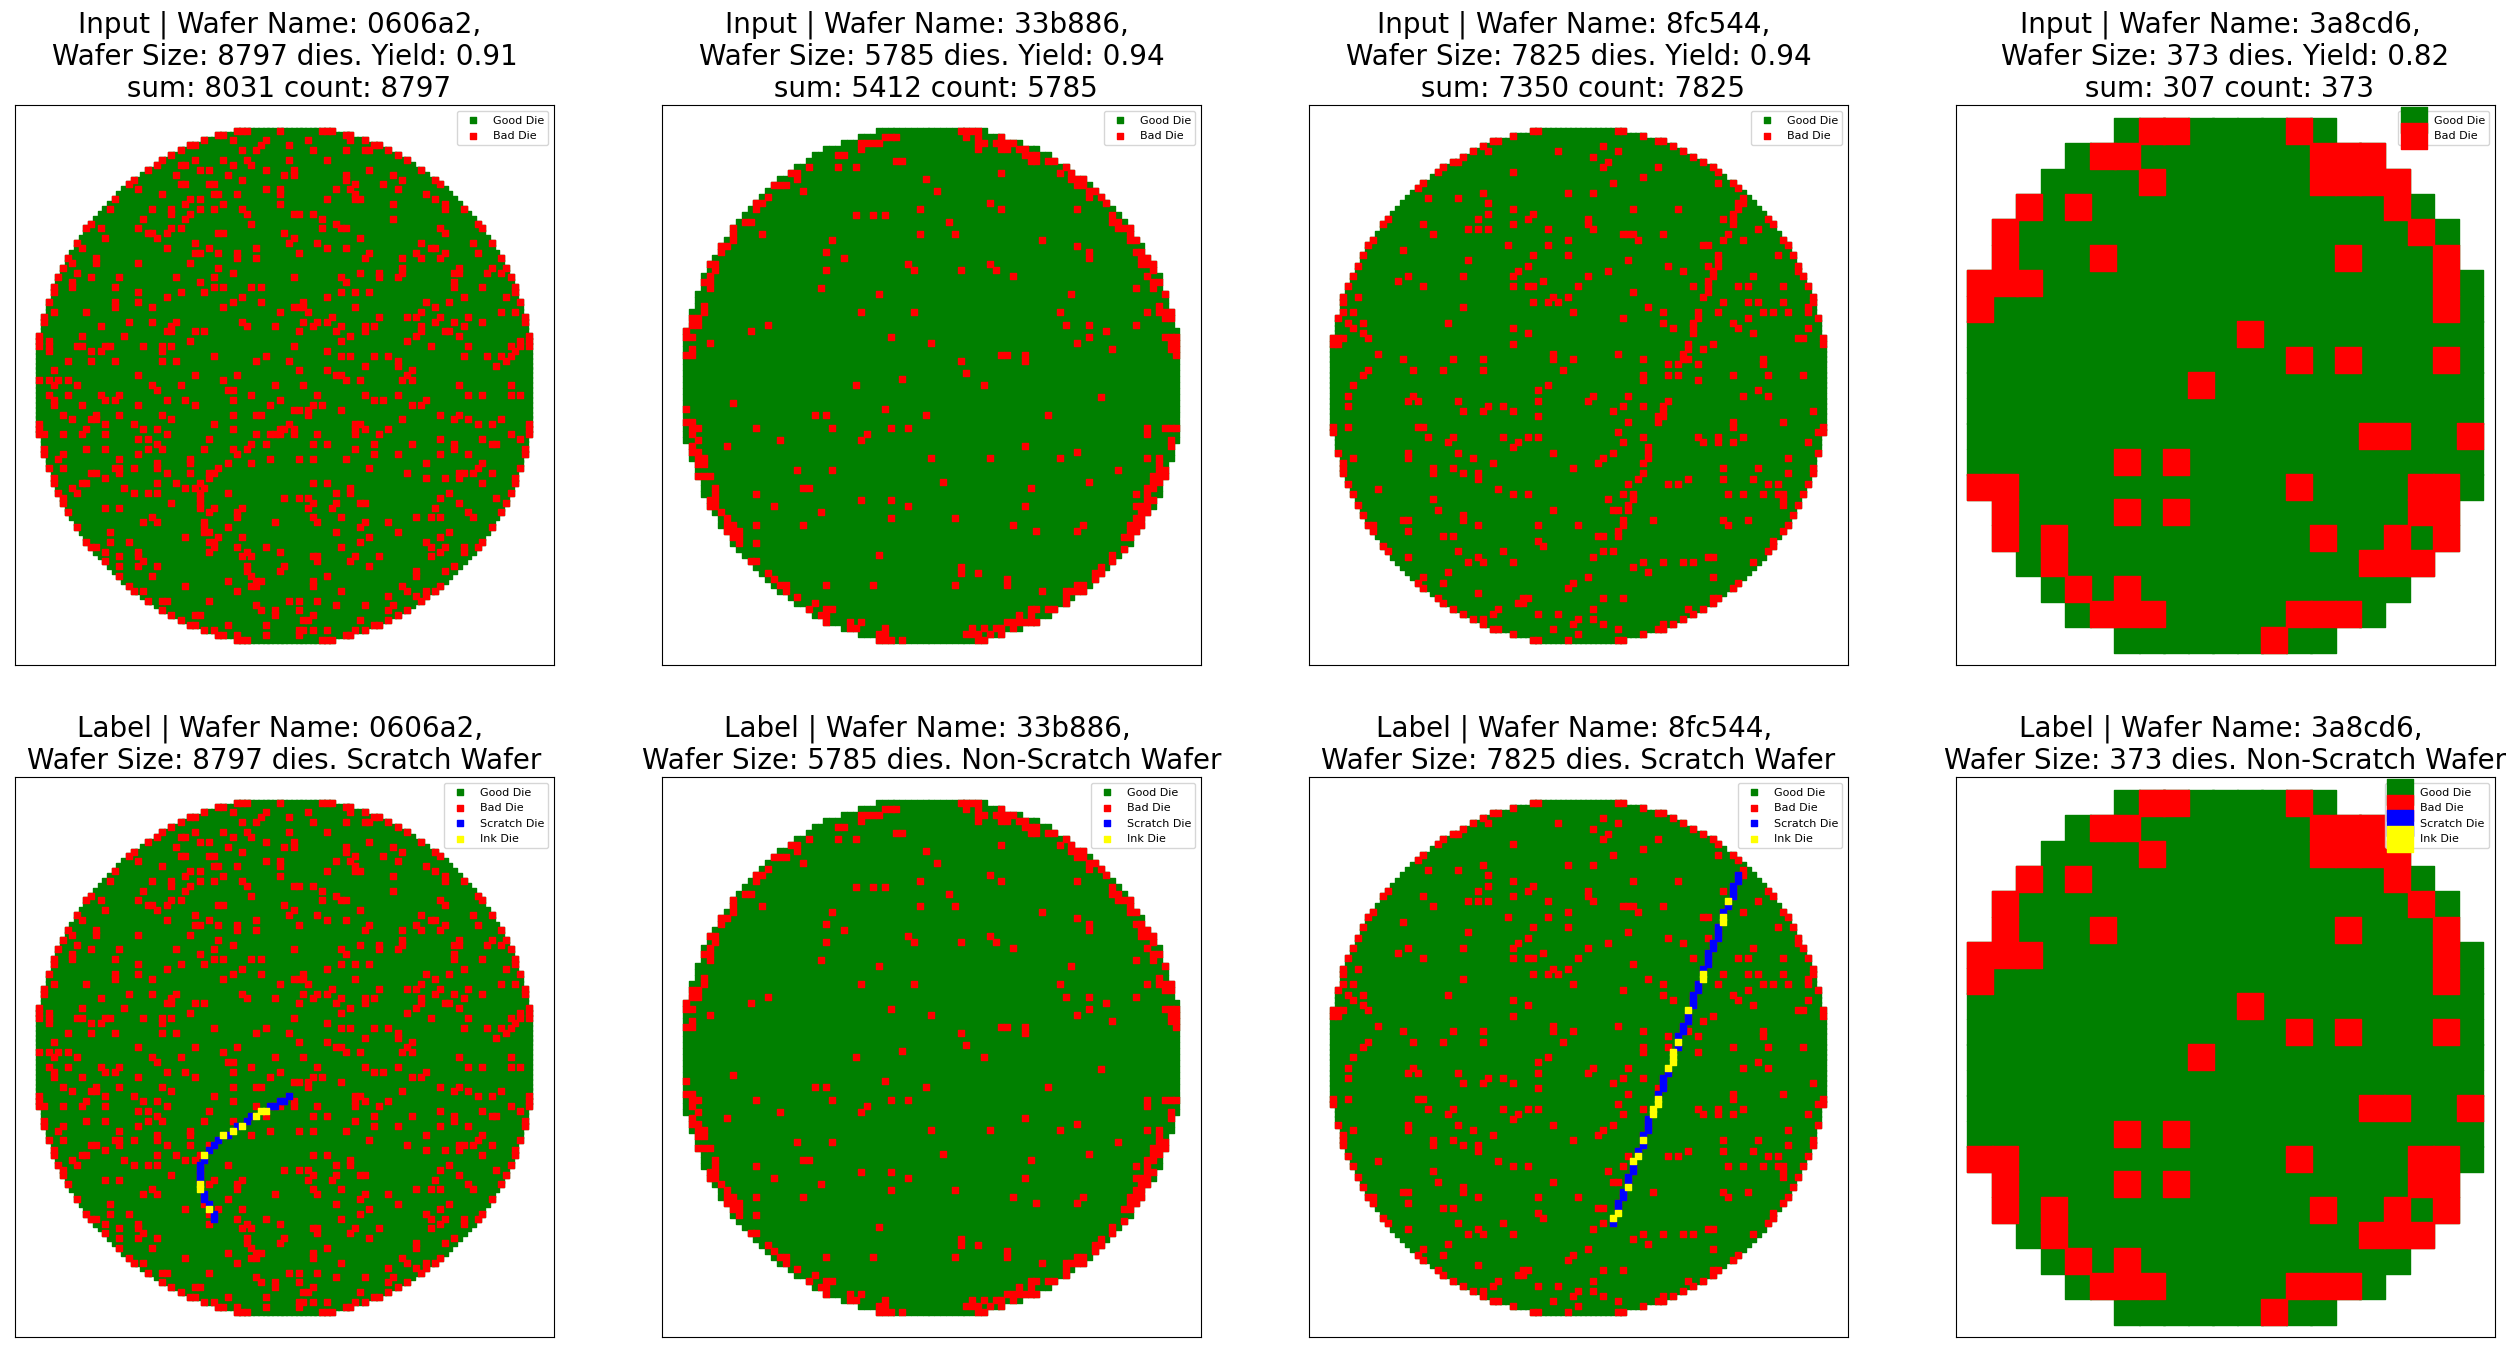

In [766]:
n_samples = 4
list_sample_train = [df_wafers.groupby('WaferName').get_group(group) for group in df_wafers['WaferName'].value_counts().sample(n_samples).index]
plot_wafer_maps(list_sample_train, figsize = 8, labels = True)

In [136]:
list_sample_test = [df_wafers_test.groupby('WaferName').get_group(group) for group in df_wafers_test['WaferName'].value_counts().sample(n_samples).index]
# plot_wafer_maps(list_sample_test, figsize = 8, labels = False)

# Build your solution

In [449]:
n_samples = 4
list_sample_train = [df_wafers.groupby('WaferName').get_group(group) for group in df_wafers['WaferName'].value_counts().sample(n_samples).index]
# # print(list_sample_train)
# hist = dict()
# # for wafer_df in list_sample_train:
# # #     is_scratched = (wafer_df['IsScratchDie'] == True).sum() > 0
# # #     if is_scratched:
# # #     wafer_yield = round((wafer_df["IsGoodDie"]).sum()/(wafer_df["IsGoodDie"]).count(), 2)
# #     max_x = (wafer_df['DieX']).max()

# #     hist[max_x] = wafer_df["IsGoodDie"].count()
# #     if wafer_yield < 0.87:
# #     mes = f'aspect ratio: {max_x} * {max_y} Scratched: {is_scratched} Yield: {wafer_yield} sum: {(wafer_df["IsGoodDie"]).sum()} count: {(wafer_df["IsGoodDie"]).count()}'
# print(hist, flush=True)


In [474]:
def plot_wafer_maps_with_cluster(wafer_df_list, figsize, labels = True):
    """
    plot wafer maps for list of df of wafers

    :param wafer_df_list: list, The list of df's of the wafers
    :param figsize: int, the size of the figsize height 
    :param labels: bool, Whether to show the layer of labels (based on column 'IsScratchDie')
    
    :return: None
    """
    def plot_wafer_map(wafer_df, ax, map_type):
        wafer_size = len(wafer_df)
        s = 2**17/(wafer_size)
        if map_type == 'Label':
            mes = 'Scratch Wafer' if (wafer_df['IsScratchDie'] == True).sum()>0 else 'Non-Scratch Wafer'
        else:
            mes = f'Yield: {round((wafer_df["IsGoodDie"]).sum()/(wafer_df["IsGoodDie"]).count(), 2)}\n sum: {(wafer_df["IsGoodDie"]).sum()} count: {(wafer_df["IsGoodDie"]).count()}'
        
        ax.set_title(f'{map_type} | Wafer Name: {wafer_df["WaferName"].iloc[0]}, \nWafer Size: {len(wafer_df)} dies. {mes}', fontsize=20)
        ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color = 'black', marker='s', s = s)
     
        if map_type == 'Label':
            bad_bins = wafer_df.loc[(wafer_df['IsGoodDie'] == False)]
            ax.scatter(wafer_df['DieX'], wafer_df['DieY'], c = wafer_df["cluster"] + 50, marker='s', s = s)
 
            scratch_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == False)]
            ax.scatter(scratch_bins['DieX'], scratch_bins['DieY'], color = 'blue', marker='s', s = s)

            ink_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == True)]
            ax.scatter(ink_bins['DieX'], ink_bins['DieY'], color = 'yellow', marker='s', s = s)

            ax.legend(['Good Die', 'Bad Die', 'Scratch Die', 'Ink Die'], fontsize=8)
        else:
            bad_bins = wafer_df.loc[(wafer_df['IsGoodDie'] == False) & (wafer_df['cluster'] > -1)]
            ax.scatter(bad_bins['DieX'], bad_bins['DieY'], c = bad_bins["cluster"], marker='s', s = s)
 
            ax.legend(['Good Die', 'Bad Die'], fontsize=8)

        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        import numpy as np
    import matplotlib.pyplot as plt
    
    if labels:
        fig, ax = plt.subplots(2, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize*2))
        for idx1, wafer_df in enumerate(wafer_df_list):
            for idx2, map_type in enumerate(['Input', 'Label']):
                plot_wafer_map(wafer_df, ax[idx2][idx1], map_type)
    else:
        fig, ax = plt.subplots(1, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize))
        for idx, wafer_df in enumerate(wafer_df_list):
            plot_wafer_map(wafer_df, ax[idx], 'Input')

    plt.show()

We start with the most basic version:

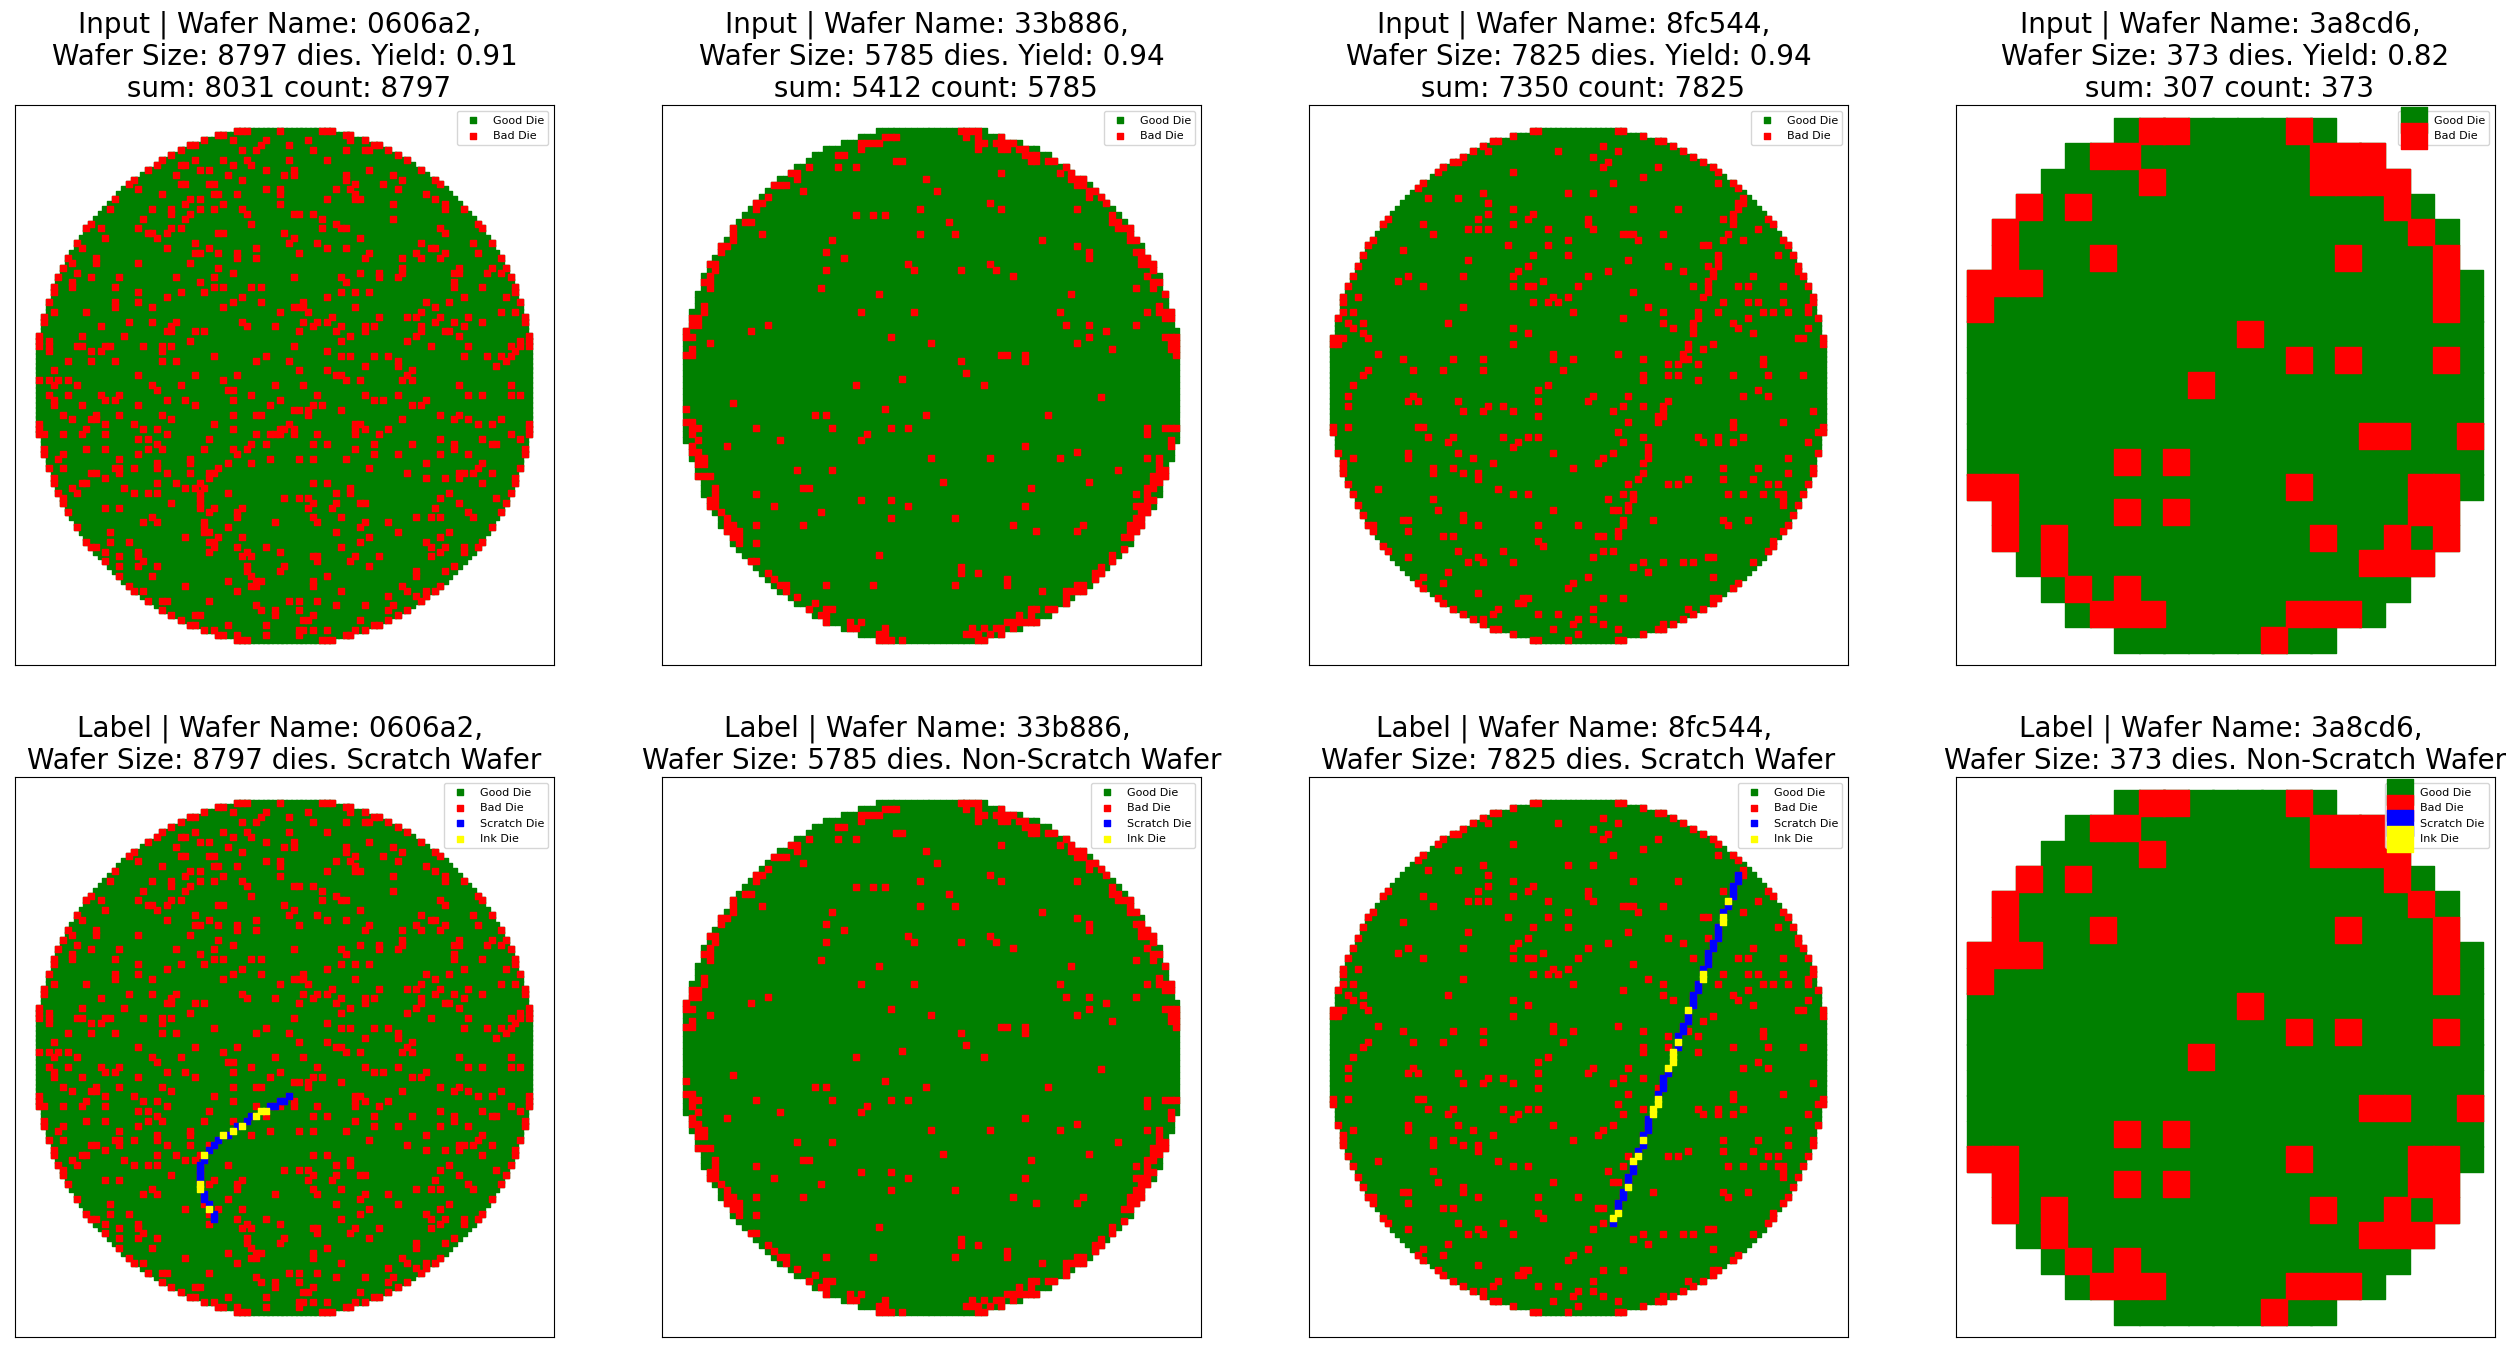

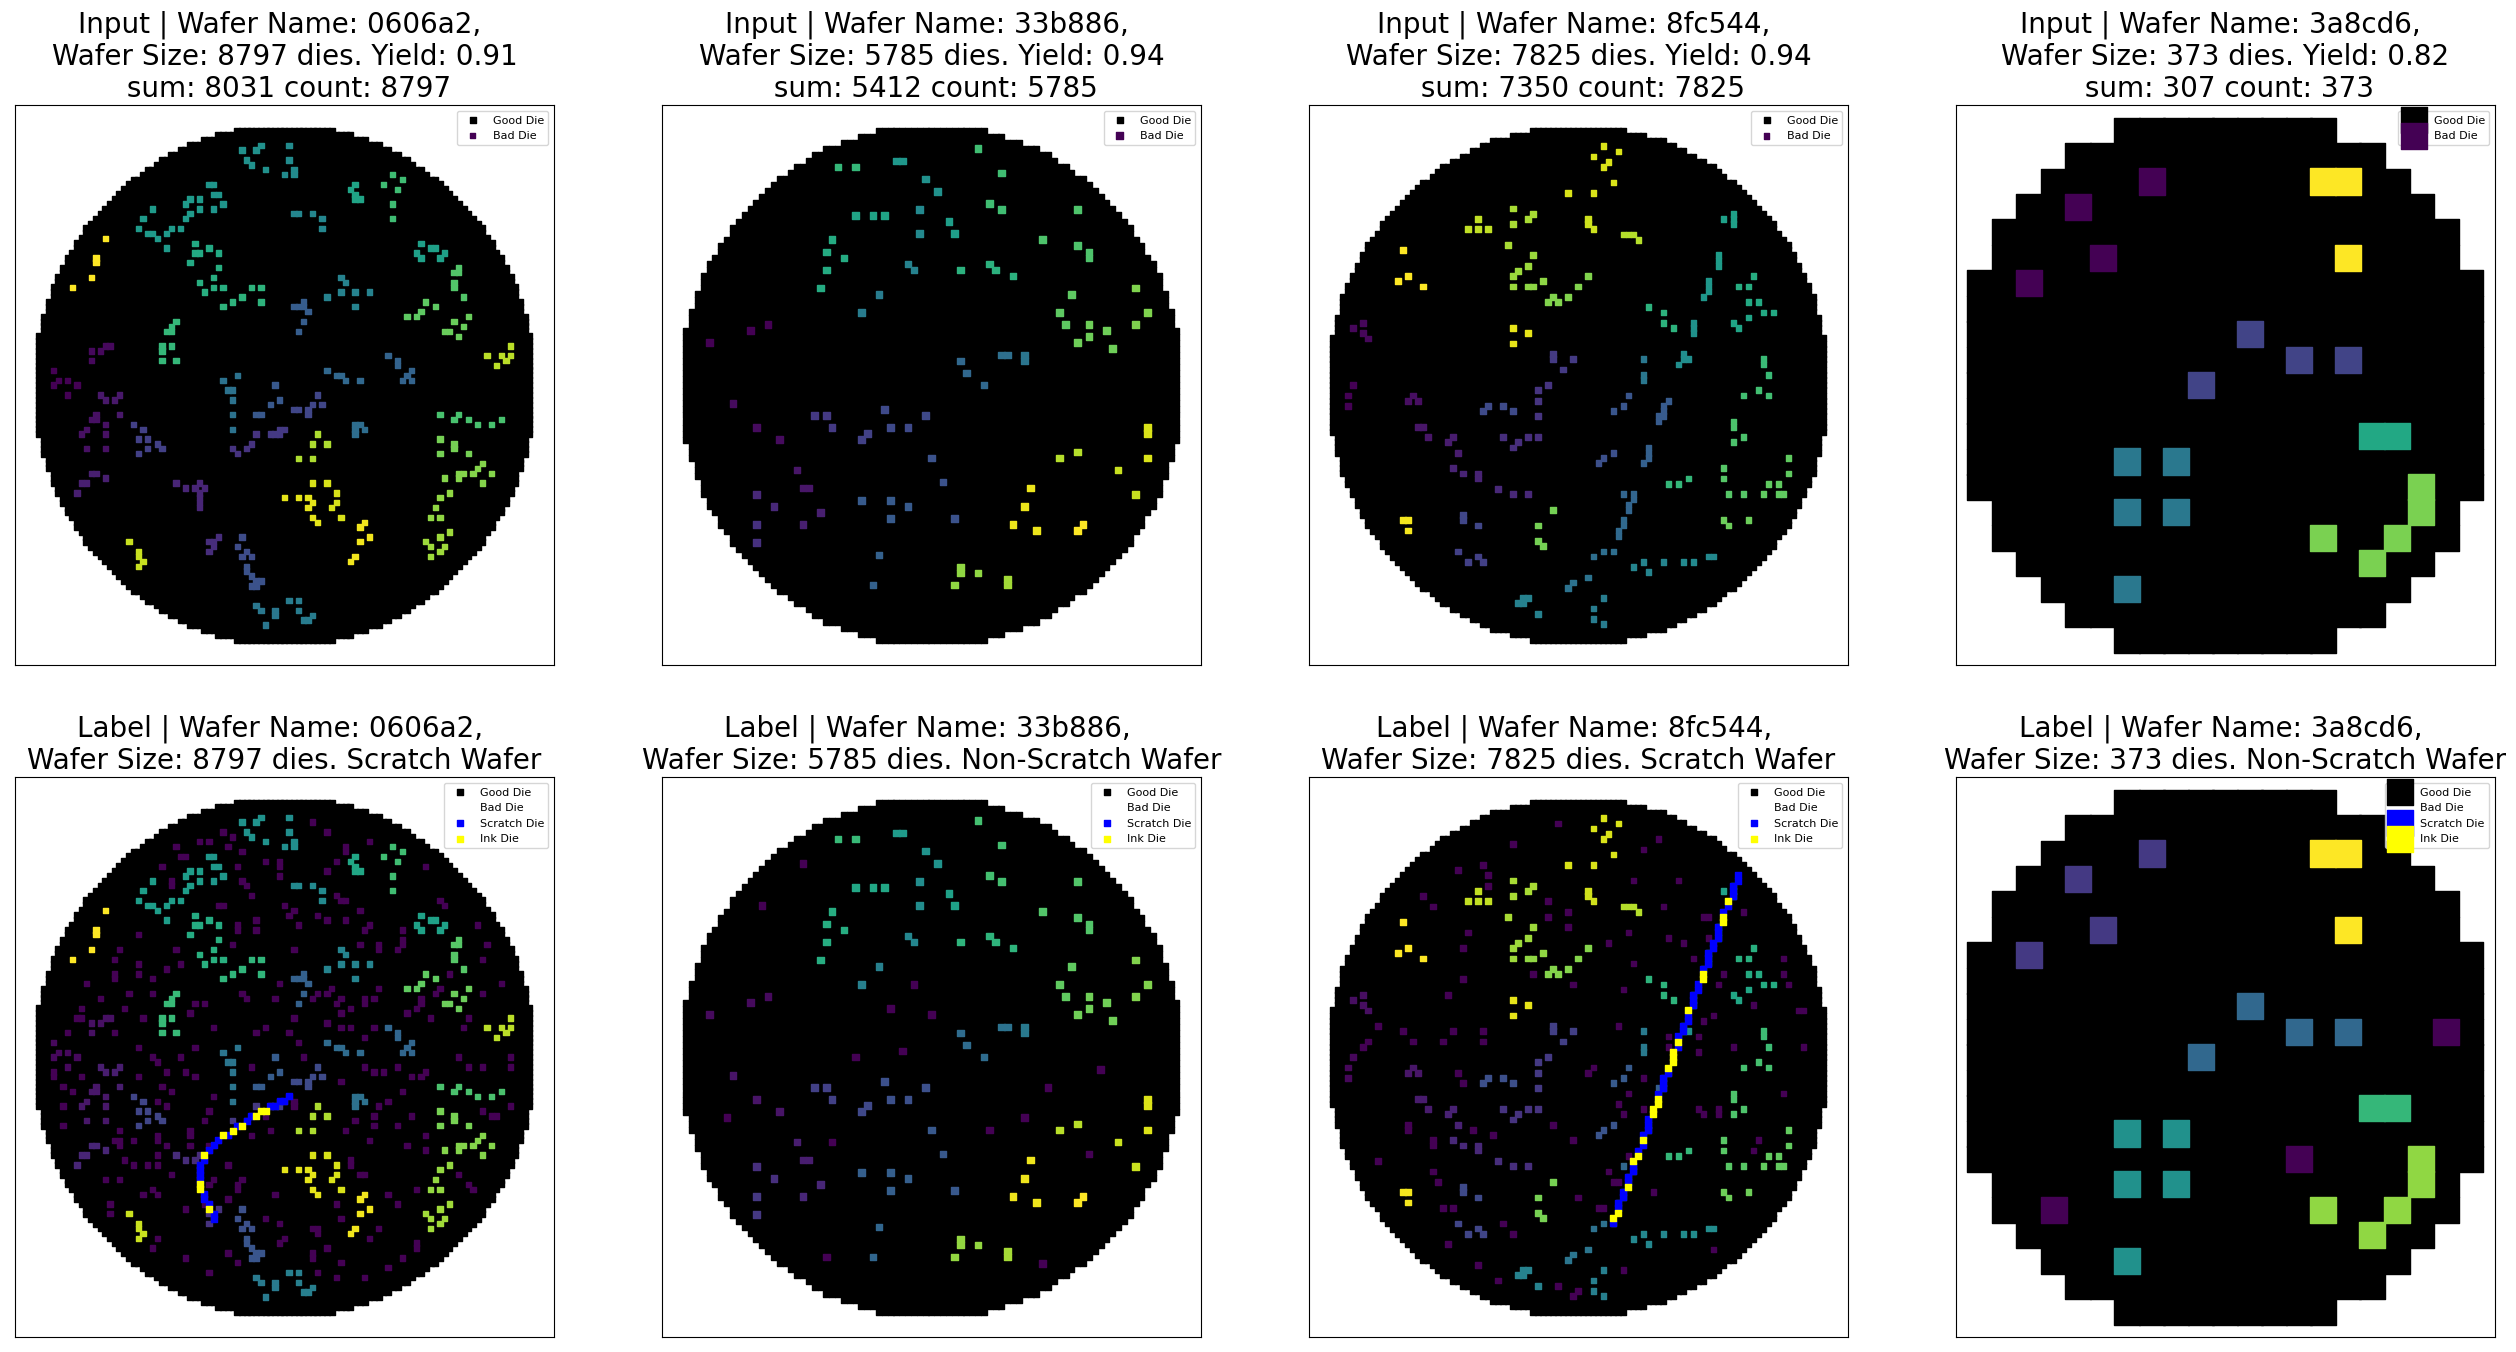

In [768]:
from sklearn.cluster import OPTICS

def get_with_clusters():
    with_clusters = []
    for wafer_df in list_sample_train:
        bad_dies = wafer_df[wafer_df["IsGoodDie"] == False][["DieX", "DieY"]]
        width = (wafer_df['DieX']).max() + 1
        center = width // 2
#         print(center**2)
#         bad_dies["distance_from_center"] = (bad_dies["DieX"] - center) ** 2 + (bad_dies["DieY"] - center) ** 2
#         print(bad_dies)
        delta = 0.1
        bad_dies = bad_dies[(bad_dies["DieX"] - center) ** 2 + (bad_dies["DieY"] - center) ** 2 < center ** 2 * (1 - delta)]
        
#         image = np.zeros((width, width), dtype="uint8")
#         for index, row in bad_dies.iterrows():
#             x, y, color = row['DieX'], row['DieY'], 1
#             image[-y - 1, x -1] = color
#         kernel = np.ones((2,2),np.uint8)
#         cluster_image = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)
#         cluster_image = image
#         cluster_df = wafer_df[cluster_image[-wafer_df["DieY"], wafer_df["DieX"]] == 1]
#         cluster_df = cluster_df[["DieX", "DieY"]]


        clustering = OPTICS(min_samples=2, min_cluster_size=0.01).fit(bad_dies)
#         print("labels", clustering.labels_)
        bad_dies["cluster"] = clustering.labels_
        df_with_clusters = wafer_df.merge(bad_dies, on=["DieX", "DieY"], how="outer")
#         print(f"len df_with_clusters = {df_with_clusters.size} cluster_df: {cluster_df.size}")
        with_clusters.append(df_with_clusters)
    return(with_clusters)

with_clusters = get_with_clusters()
# print(list_sample_train)
plot_wafer_maps(list_sample_train, figsize = 8, labels = True)
plot_wafer_maps_with_cluster(with_clusters, figsize = 8, labels = True)

In [990]:
def no_axis(ax):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False) 


TPs: [0.8823529411764706, 0.29411764705882354, 0.8823529411764706, 0.29411764705882354, 0.8823529411764706, 0.35294117647058826]
TPs: [0.8888888888888888, 0.3055555555555556, 0.6944444444444444, 0.3055555555555556, 0.6944444444444444, 0.19444444444444445]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

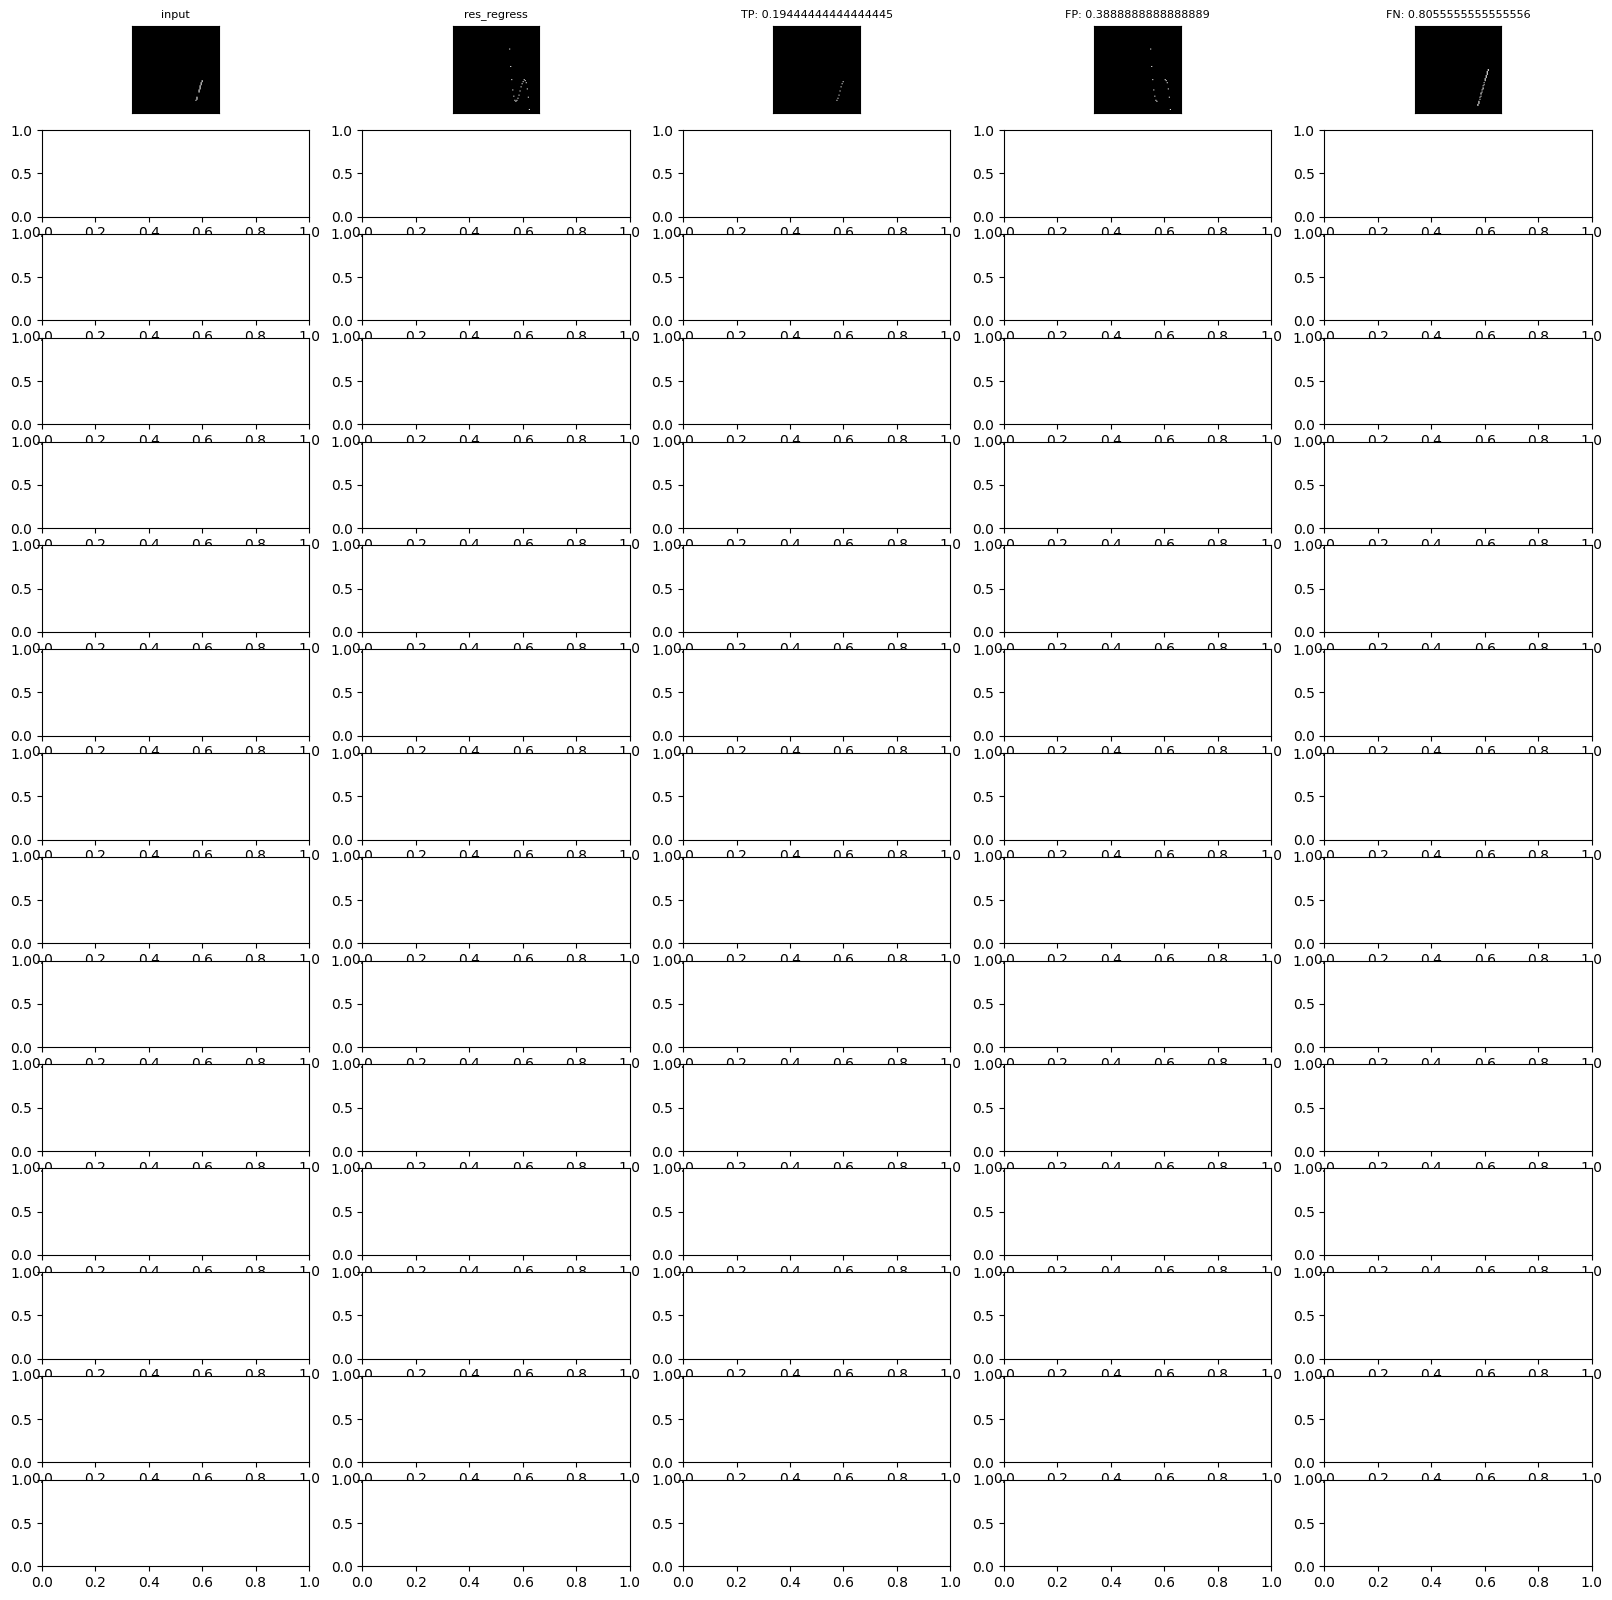

In [1082]:
# from scipy.ndimage import binary_fill_holes
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import math
# print(algo_image)
binarized = 1.0 * (algo_image > 1.0)
converted = binarized.astype("uint8")
# print(np.sum(converted))
width = algo_image.shape[1]
original = list_sample_train[ALG_IND]

def reshape_from_1d(arr):
    return np.array(arr).reshape(-1, 1)


def regression_by_ys(deg, source_image):
    include_bias = 1
    mask_bits = np.argwhere(source_image == 1)
    xs = reshape_from_1d([mb[0] for mb in mask_bits])
    ys = reshape_from_1d([mb[1] for mb in mask_bits])
    
    interaction = PolynomialFeatures(degree = deg, include_bias = bool(include_bias))
    interaction_x = interaction.fit_transform(xs)
    interaction_y = interaction.fit_transform(ys)
    
    regY = LinearRegression().fit(interaction_y, xs)
    regression_result = np.zeros((width, width), dtype="uint8")
        
    test_interaction = interaction.fit_transform(np.arange(width).reshape(-1, 1))
    for inter in test_interaction:         
        res_x = int(regY.predict([inter]).round())
        if -1 < res_x < width:
            regression_result[res_x, int(inter[include_bias])] = 1
    
    distances = [
        abs(dot[0] 
            - regY.predict(
                interaction.fit_transform(
                    reshape_from_1d([dot[1]])
                )  
            )[0][0].round()
           )
        for dot in mask_bits
    ]
#     print("dist", distances)
    error = math.ceil(sum(distances) / len(distances))
#     print(error)
    
    filtered = np.copy(source_image)
    for dot in mask_bits:
        res = regY.predict(interaction.fit_transform(reshape_from_1d([dot[1]])))[0]
        if abs(dot[0] - res) > 2*error:
            filtered[dot[0], dot[1]] = False
    return regression_result, error, filtered

def regression_by_xs(deg, source_image):
    
    include_bias = 1
    mask_bits = np.argwhere(source_image == 1)
    xs = reshape_from_1d([mb[0] for mb in mask_bits])
    ys = reshape_from_1d([mb[1] for mb in mask_bits])
    
    interaction = PolynomialFeatures(degree = deg, include_bias = bool(include_bias))
    interaction_x = interaction.fit_transform(xs)
    interaction_y = interaction.fit_transform(ys)
    
    regX = LinearRegression().fit(interaction_x, ys)
    regY = LinearRegression().fit(interaction_y, xs)
    regression_result = np.zeros((width, width), dtype="uint8")
    
    test_interaction = interaction.fit_transform(np.arange(width).reshape(-1, 1))
    for inter in test_interaction:
#         print(inter)
        res_y = int(regX.predict([inter]).round())
        if -1 < res_y < width:
            regression_result[int(inter[include_bias]), res_y] = 1 
    distances = [
        abs(dot[1] 
            - regX.predict(
                interaction.fit_transform(
                    reshape_from_1d([dot[0]])
                )  
            )[0][0].round()
           )
        for dot in mask_bits
    ]
#     print("dist", distances)
    error = math.ceil(sum(distances) / len(distances))
#     print(error)    
    filtered = np.copy(source_image)
    for dot in mask_bits:
        res = regX.predict(interaction.fit_transform(reshape_from_1d([dot[0]])))[0]
        if abs(dot[1] - res) > 2*error:
            filtered[dot[0], dot[1]] = False
    return regression_result, error, filtered


        
        
# filled = binary_fill_holes(converted)

fig, ax = plt.subplots(15, 5, figsize=(20,20))



cnt = 0

def regress_and_clear_noise(poly_dim=1, use_labels=False, regression=None):
    global cnt
    prev = None
    filtered_image = converted
    if not use_labels:
        scratch = filtered_image
    else:
        scratch = np.zeros((width, width), dtype="uint8")
        for index, row in original.iterrows():
            x, y, color = row['DieX'], row['DieY'], row["IsScratchDie"]
            scratch[-y , x ] = color
    iterations = 0
    while not np.array_equal(filtered_image, prev) and iterations < 20:
        iterations += 1
        prev = filtered_image
        res_regress, error, filtered_image = regression(poly_dim, filtered_image)
        ax[cnt][0].imshow(prev, cmap="gray")
        ax[cnt][0].set_title('input', fontsize=8)
        no_axis(ax[cnt][0])

        ax[cnt][1].imshow(res_regress, cmap="gray")
        ax[cnt][1].set_title('res_regress', fontsize=8)
        no_axis(ax[cnt][1])

        scratch_sum = np.sum(scratch)
        TP = res_regress & scratch
        TP_sum = np.sum(TP)
        ax[cnt][2].imshow(TP, cmap="gray")
        ax[cnt][2].set_title(f'TP: {TP_sum/scratch_sum}', fontsize=8)
        no_axis(ax[cnt][2])

        FP = res_regress & ~scratch
        FP_sum = np.sum(FP)
        ax[cnt][3].imshow(FP, cmap="gray")
        ax[cnt][3].set_title(f'FP: {FP_sum/scratch_sum}', fontsize=8)
        no_axis(ax[cnt][3])
        FN = ~res_regress & scratch
        FN_sum = np.sum(FN)
        ax[cnt][4].imshow(FN, cmap="gray")
        ax[cnt][4].set_title(f'FN: {FN_sum/scratch_sum}', fontsize=8)
        no_axis(ax[cnt][4])
#         cnt += 1
    return res_regress, TP_sum/scratch_sum

def get_best_approximator(use_labels=False):
    results = [
        regress_and_clear_noise(1, use_labels, regression_by_xs),
        regress_and_clear_noise(1, use_labels, regression_by_ys),
        regress_and_clear_noise(2, use_labels, regression_by_xs),
        regress_and_clear_noise(2, use_labels, regression_by_ys),
        regress_and_clear_noise(3, use_labels, regression_by_xs),
        regress_and_clear_noise(3, use_labels, regression_by_ys),
    ]
    selected = min(results, key=lambda x: x[1])
#     ind = results.index(selected, key=lambda x: x[1])
#     print("Linear TP: ", linear_TP, "poly TP: ", poly_TP)
#     print(f'Chose {["Linear X", "Linear Y", "Poly X", "Poly Y"][ind]}')
    print(f'TPs: {[res[1] for res in results]}')
    return selected[0]
get_best_approximator()









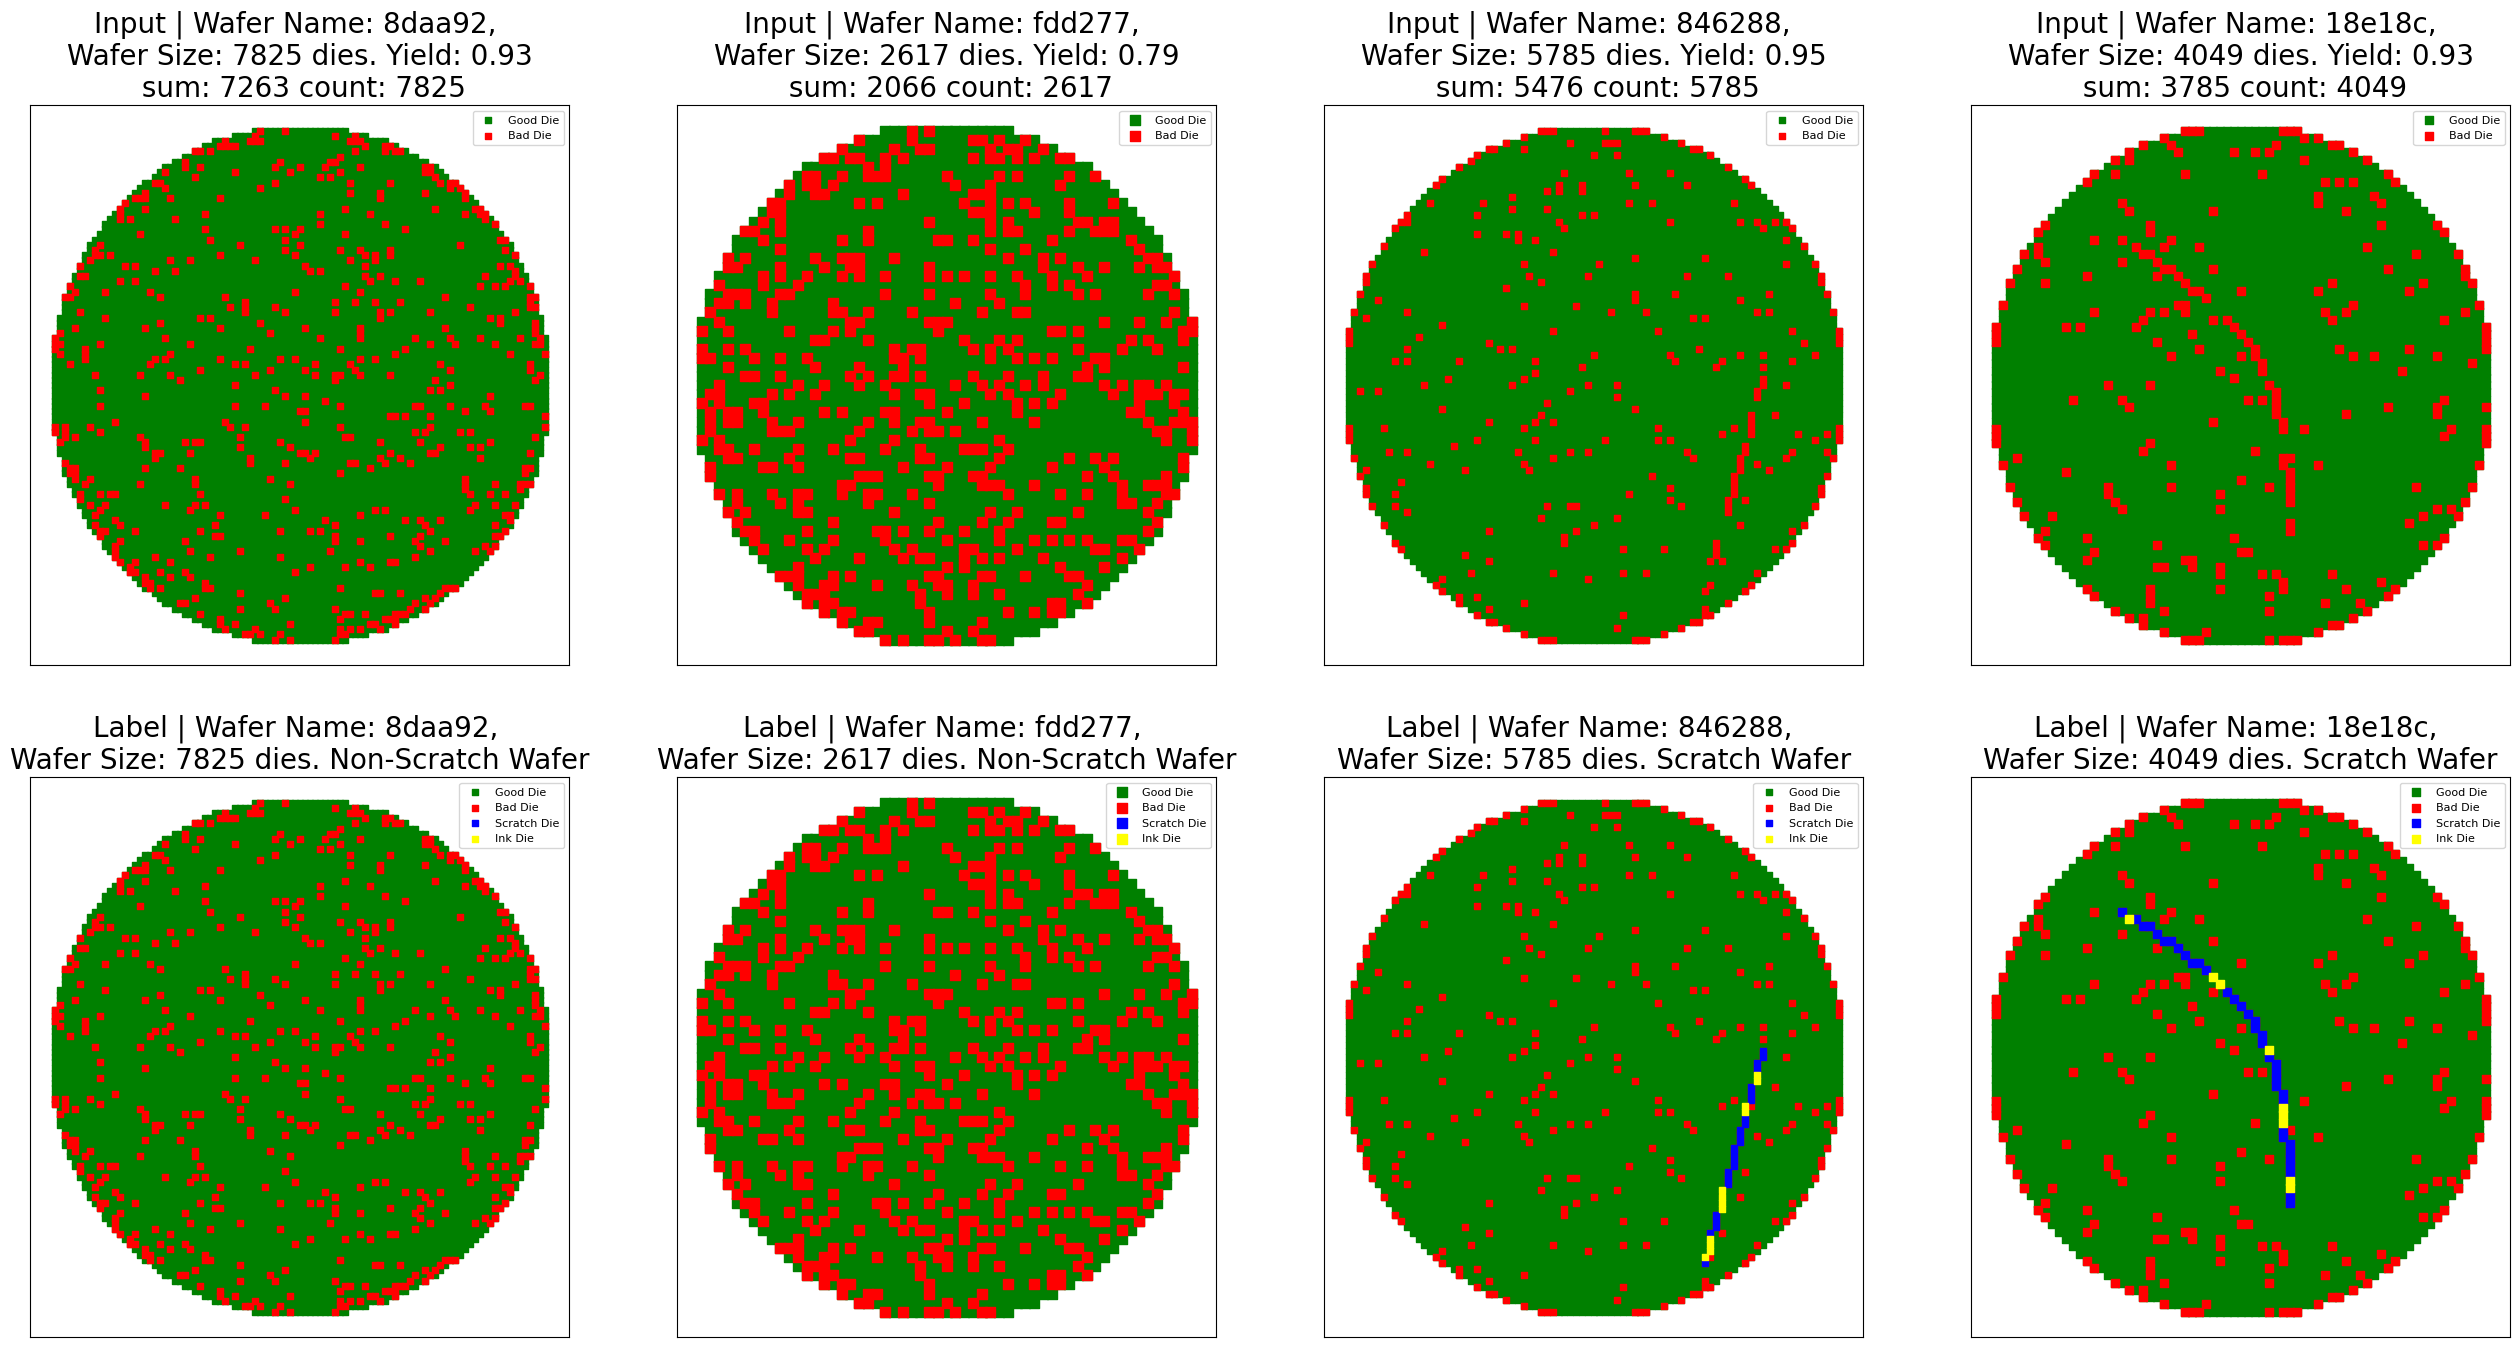

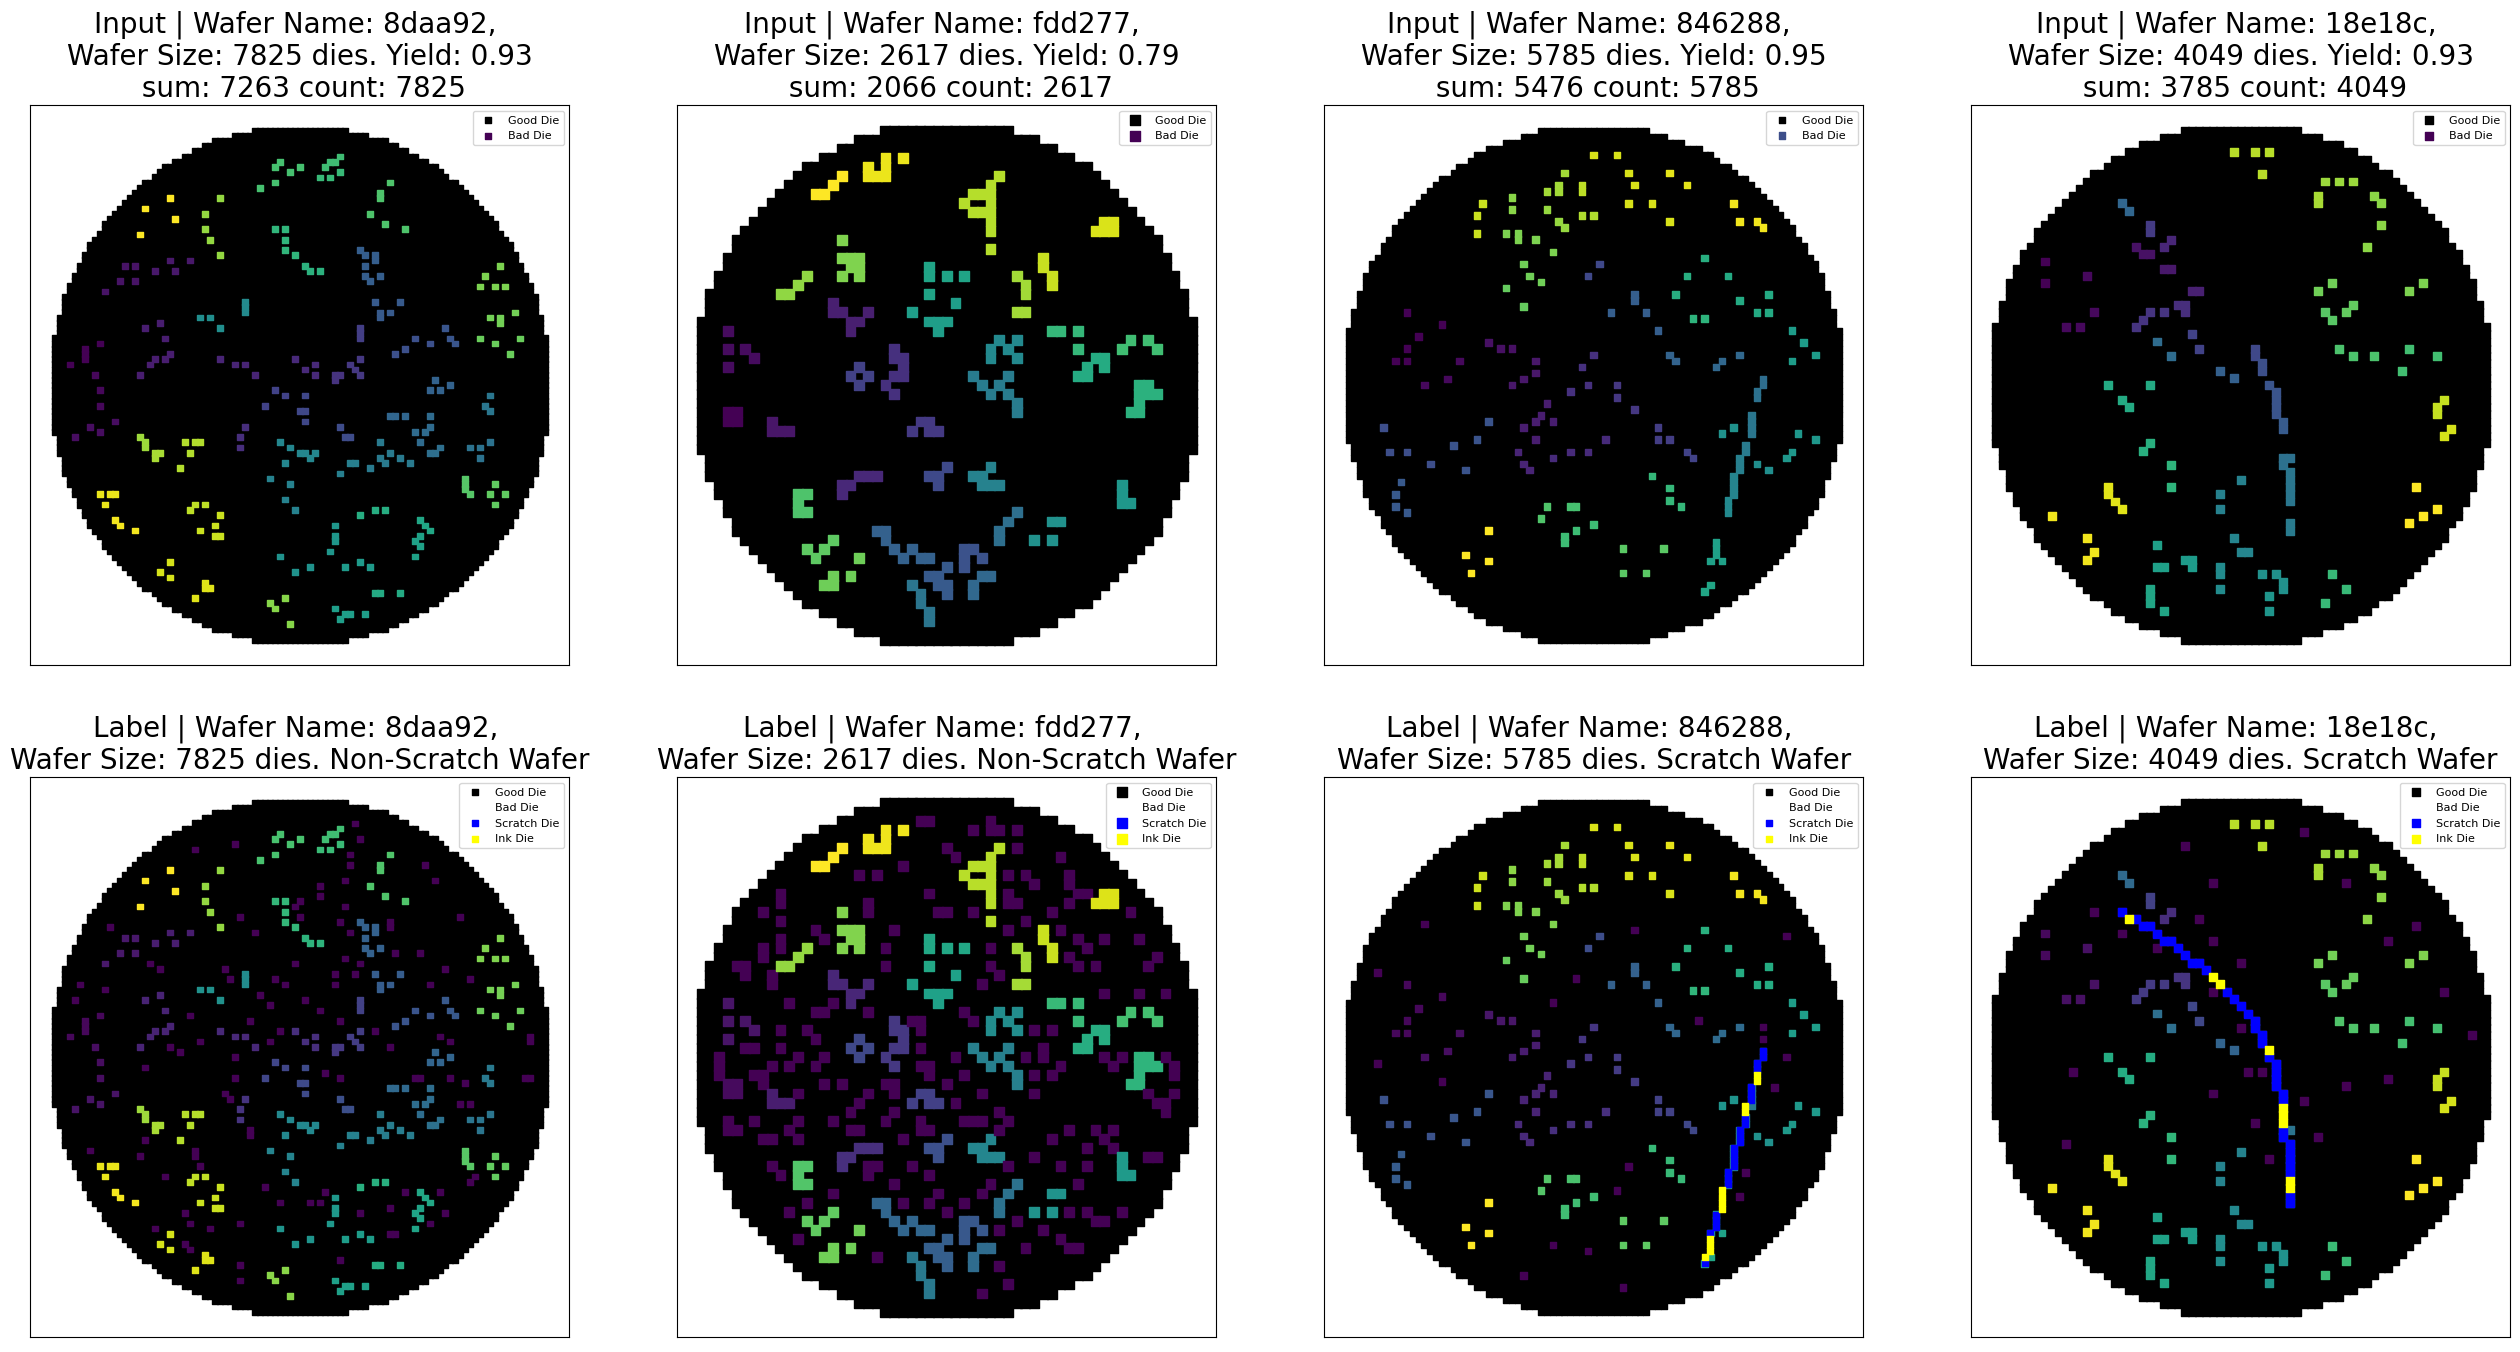

71
big 627.264
big: []
med: 470.44800000000004
med: [(154.0, 0.00024551066217732886), (161.5, 0.00025746735027038056), (210.0, 0.0003347872666054484), (203.0, 0.0003236276910519335), (161.5, 0.00025746735027038056), (154.0, 0.00024551066217732886), (154.0, 0.00024551066217732886), (161.5, 0.00025746735027038056), (161.0, 0.00025667023773084377), (161.0, 0.00025667023773084377), (161.0, 0.00025667023773084377), (203.0, 0.0003236276910519335)]
small 313.632
small: [(154.0, 0.00024551066217732886), (105.0, 0.0001673936333027242), (161.5, 0.00025746735027038056), (105.0, 0.0001673936333027242), (147.0, 0.0002343510866238139), (105.0, 0.0001673936333027242), (105.0, 0.0001673936333027242), (147.0, 0.0002343510866238139), (105.0, 0.0001673936333027242), (210.0, 0.0003347872666054484), (105.0, 0.0001673936333027242), (105.0, 0.0001673936333027242), (105.0, 0.0001673936333027242), (203.0, 0.0003236276910519335), (161.5, 0.00025746735027038056), (154.0, 0.00024551066217732886), (105.0, 0.000167

/var/folders/px/804gfth92hg4738vljvtkbb40000gn/T/ipykernel_34649/1131870501.py:148: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


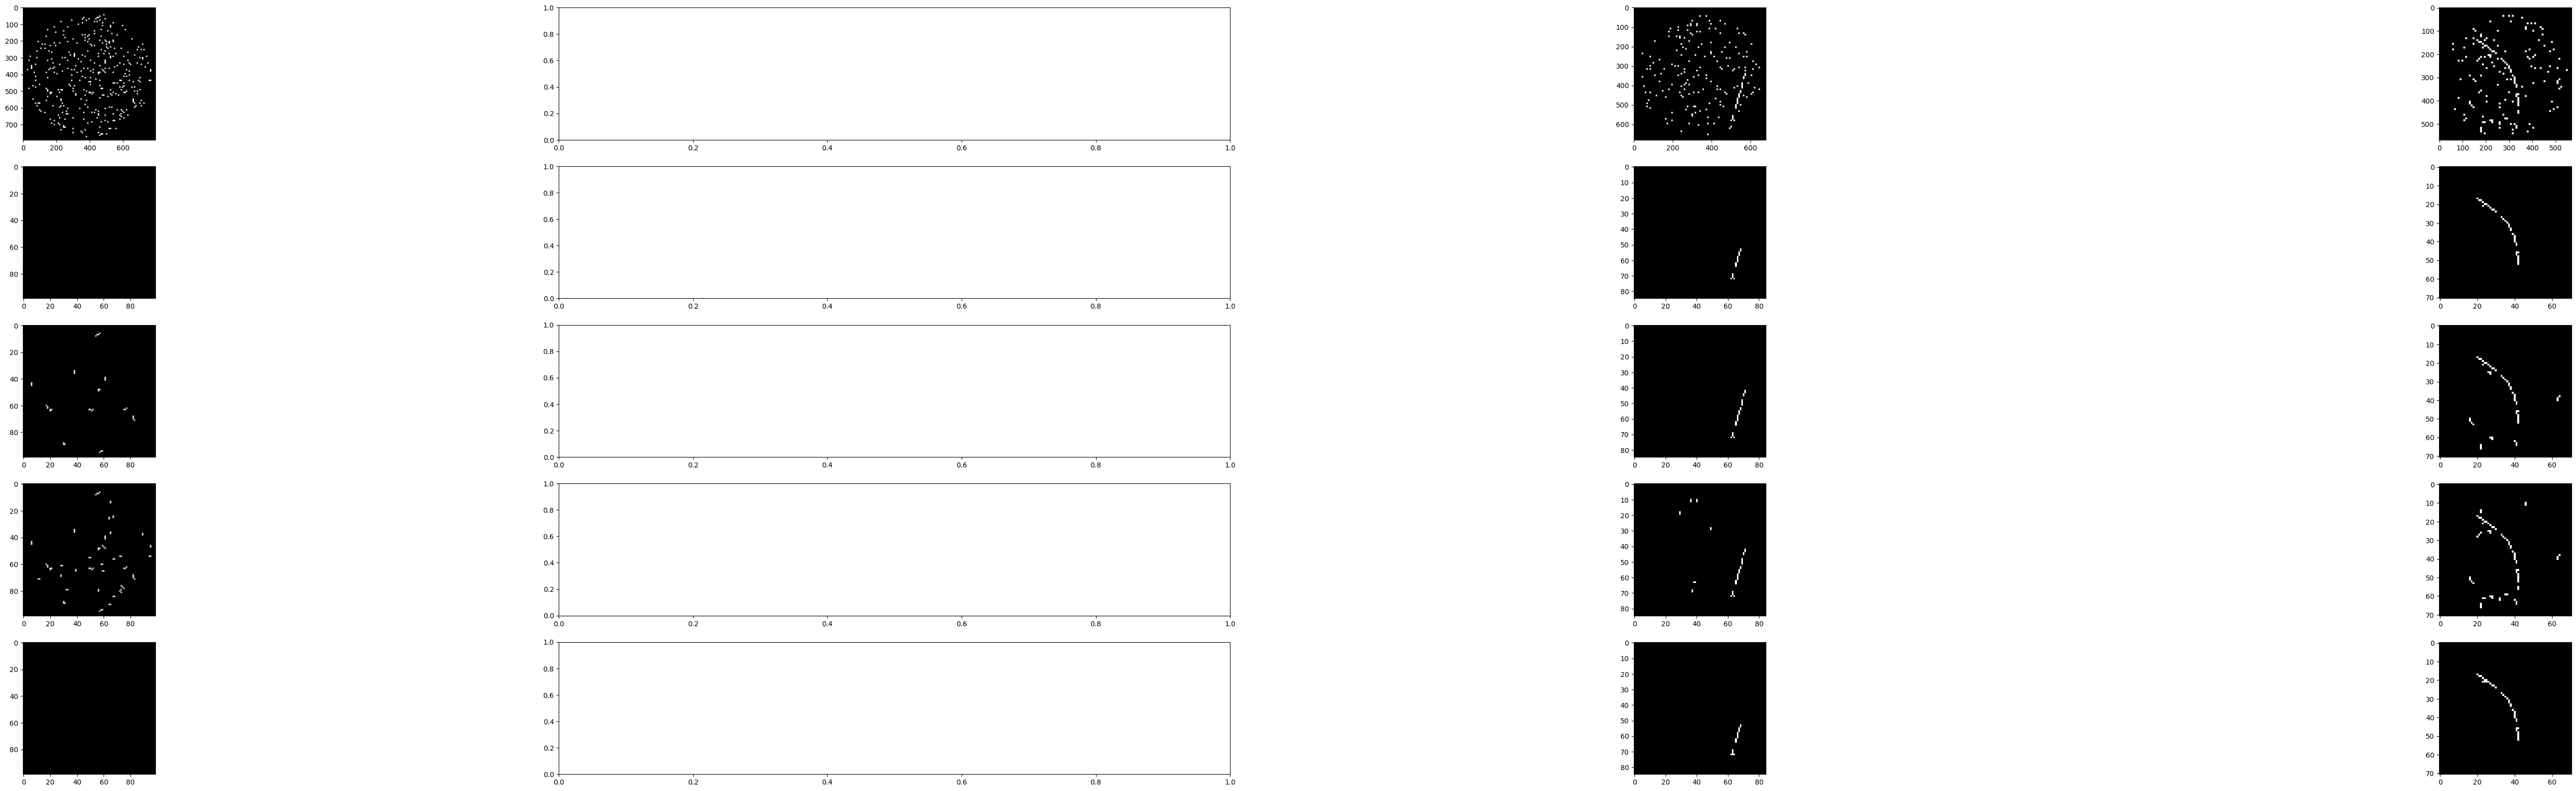

In [1079]:
n_samples = 4
ALG_IND = 2
MED = False
# list_sample_train = [df_wafers.groupby('WaferName').get_group(group) for group in df_wafers['WaferName'].value_counts().sample(n_samples).index]
plot_wafer_maps(list_sample_train, figsize = 8, labels = True)

with_clusters = get_with_clusters()
plot_wafer_maps_with_cluster(with_clusters, figsize = 8, labels = True)

from skimage import feature
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def Distance(cluster_img, cluster_a, cluster_b):
#     print(cluster_img)
#     print("where a", np.argwhere(cluster_img==cluster_a))
#     print("where b", np.argwhere(cluster_img==cluster_b))
    return cdist(np.argwhere((cluster_img==cluster_a + 100) | (cluster_img==-1)),np.argwhere((cluster_img==cluster_b + 100) | (cluster_img==-1)),'cityblock').min()

fig, ax = plt.subplots(5, len(with_clusters), figsize=(20*len(with_clusters), 20))
for i, wafer in enumerate(with_clusters):
    original = list_sample_train[i]
    wafer_yield = (original["IsGoodDie"]).sum()/(original["IsGoodDie"]).count()
    wafer_size = len(wafer_df)
    
    print(width)
    if wafer_yield < 0.875:
        continue
    bad_bins = wafer.loc[(wafer['IsGoodDie'] == False)]
#     print(bad_bins)
    width = (original['DieX']).max() + 1
  
    center = ((bad_bins['DieX']).max() + 1) // 2
    delta = 0.1
    bad_bins = bad_bins[(bad_bins["DieX"] - center) ** 2 + (bad_bins["DieY"] - center) ** 2 < center ** 2 * (1 - delta)]
    
    image = np.zeros((width, width), dtype="uint8")
    for index, row in bad_bins.iterrows():
        x, y, color = row['DieX'], row['DieY'], 100
        image[-y, x] = color
    image = cv.resize(image, dsize=(8*width, 8*width), interpolation=cv.INTER_NEAREST)

#     edges = cv.Canny(image,100,200, apertureSize=7, L2gradient =True)
#     edges = feature.canny(image, sigma=2, mode="nearest")
#     edges2 = edges.astype(np.uint8)
    contours, hierarchy = cv.findContours(image.astype(np.uint8), 1, 2)
    big_contours_img = np.ones([8*width, 8*width])
    med_contours_img = np.ones([8*width, 8*width])
    small_contours_img = np.ones([8*width, 8*width])
#     print(len(contours), end=" ")
    print("big", (64 * 0.001 * width**2))
    smallest_contour = min([cv.contourArea(c) for c in contours])
    big_contours = [c for c in contours if cv.contourArea(c) > 5 * smallest_contour]
    print("big:", [(cv.contourArea(c), cv.contourArea(c) / (64*width**2)) for c in big_contours])
    print("med:",64 * 0.00075 * width**2)
    med_contours = [c for c in contours if cv.contourArea(c) > 3 * smallest_contour]
    print("med:", [(cv.contourArea(c), cv.contourArea(c) /(64*width**2)) for c in med_contours])
    print("small", 64 * 0.0005 * width**2)
    small_contours = [c for c in contours if cv.contourArea(c) > 2* smallest_contour]
    print("small:", [(cv.contourArea(c), cv.contourArea(c)/ (64*width**2)) for c in small_contours])
#     print(len(filtered_contours))
    cv.drawContours(big_contours_img, big_contours, -1, color=(255,255,255), thickness=-1)
    cv.drawContours(med_contours_img, med_contours, -1, color=(255,255,255), thickness=-1)
    cv.drawContours(small_contours_img, small_contours, -1, color=(255,255,255), thickness=-1)

    big_contours_img_downsampled = cv.resize(big_contours_img, (width, width), interpolation=cv.INTER_NEAREST)
    small_contours_img_downsampled = cv.resize(small_contours_img, (width, width), interpolation=cv.INTER_NEAREST)
    med_contours_img_downsampled = cv.resize(med_contours_img, (width, width), interpolation=cv.INTER_NEAREST)
    
    
    contours_2, hierarchy = cv.findContours((img / 32).astype(np.uint8), 1, 2)

    cv.drawContours(img, contours_2, -1, color=(255,255,255), thickness=-1)


    big_contours_img_downsampled = cv.resize(big_contours_img, (width, width), interpolation=cv.INTER_NEAREST)
    small_contours_img_downsampled = cv.resize(small_contours_img, (width, width), interpolation=cv.INTER_NEAREST)
    med_contours_img_downsampled = cv.resize(med_contours_img, (width, width), interpolation=cv.INTER_NEAREST)
#     ax[2][i].imshow(img, cmap="gray")
#     ax[1][i].imshow(edges2, cmap="gray")
    ax[0][i].imshow(image, cmap="gray")
    ax[3][i].imshow(small_contours_img_downsampled, cmap="gray")
    ax[2][i].imshow(med_contours_img_downsampled, cmap="gray")
    ax[1][i].imshow(big_contours_img_downsampled, cmap="gray")
    if i == ALG_IND:
        algo_image = big_contours_img_downsampled
        if MED:
            algo_image = med_contours_img_downsampled
    with_predictions = original.copy()

    for index, row in original.iterrows():
        with_predictions["pred"] = med_contours_img_downsampled[-row["DieY"], row["DieX"]] != 1
    
#     print(with_predictions)
#     unique_clusters = bad_bins[(bad_bins["pred"] == 1)]["cluster"].unique()

    
#     predictions_in_cluster = list()
#     for cl in unique_clusters:
#         pr = len(bad_bins[(bad_bins["pred"] == 1) & (bad_bins["cluster"] == cl)])
#         predictions_in_cluster.append(pr)

# #     print([i for i in zip(unique_clusters, predictions_in_cluster)])
#     salient_cluster = None
#     if len(predictions_in_cluster):
#         salient_cluster = unique_clusters[predictions_in_cluster.index(max(predictions_in_cluster))]
    
#     if len(unique_clusters) > 10:
#         bad_bins["pred"] = False
#     else:
#     cluster_image = np.zeros((width, width), dtype="uint8")
#     for index, row in bad_bins[bad_bins["pred"] == 1].iterrows():
#         x, y, color = row['DieX'], row['DieY'], row["cluster"] + 100
#         cluster_image[-y, x] = color
    kernel = np.ones((1,5),np.uint8)
#     ax[3][i].imshow(cluster_image)
# #         distance_matrix = np.zeros((len(unique_clusters), len(unique_clusters)))
# #         print(unique_clusters)
#     bad_clusters = list()
#     for k, cluster_a in enumerate(unique_clusters):
#         distances = [np.inf]
#         for j, cluster_b in enumerate(unique_clusters):
# #                 print(cluster_a,cluster_b)
#             if cluster_a != cluster_b:
#                 distances.append(Distance(cluster_image, cluster_a, cluster_b))
# #             print(f"MIN FOR image {i}, cluster {cluster_a} is {min(distances)}")
# #             print(distances)
# #             print("center", center)
#         if min(distances) >= center * 0.2 and cluster_a != salient_cluster:
#             bad_clusters.append(cluster_a)
#     print(bad_clusters)
#     cleaned_cluster_image = np.zeros((width, width), dtype="uint8")
#     for index, row in bad_bins[(bad_bins["pred"] == 1) & (~bad_bins["cluster"].isin(bad_clusters))].iterrows():
#         x, y, color = row['DieX'], row['DieY'], row["cluster"] + 100
#         cleaned_cluster_image[-y, x] = color


    d_im = cv.dilate(big_contours_img_downsampled, kernel, iterations=4)
    e_im = cv.erode(d_im, kernel, iterations=4)
    ax[4][i].imshow(e_im, cmap="gray")
#     wafer_df = list_sample_train[i]
# #         wafer_df["IsScratchDie"] = 0
#     wafer_df[(d_im_2[-wafer_df["DieY"], wafer_df["DieX"]] == 1)]["IsScratchDie"] = True

#         ax[2][i].imshow(e_im_2)   
fig.show()
#     print(bad_bins.head())
#     ax.scatter(bad_bins['DieX'], bad_bins['DieY'], c = bad_bins["cluster"], marker='s', s = s)

#     edges1 = feature.canny(wafer)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
        WaferName  DieX  DieY  IsGoodDie  IsScratchDie
4272982    53951e    35    15      False          True
4272983    53951e    35    16      False          True
4273069    53951e    36    17      False          True
4273070    53951e    36    18       True          True
4273071    53951e    36    19      False          True
4273157    53951e    37    20      False          True
4273158    53951e    37    21      False          True
4273244    53951e    38    22       True          True
4273245    53951e    38    23      False          True
4273246    53951e    38    24      False          True
4273332    53951e    39    25      False          True
4273333    53951e    39    26      False          True
4273334    53951e    39    27       True          True
4273420    53951e    40    28       True          True
4273421    53951e  

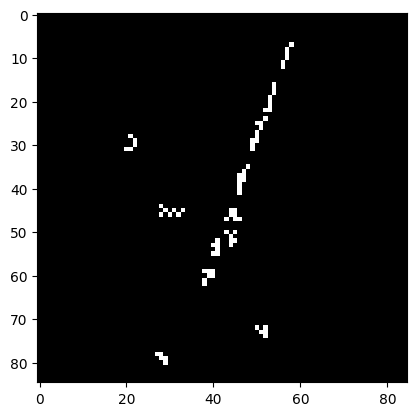

In [658]:
pd.set_option('display.max_rows', 100)
fig, ax = plt.subplots(1, 1)

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle(v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector((1, 0))
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))


def find_next_tip_candidate(mask_bits, tip_x, tip_y):
    candidates = [tuple(tup) for tup in mask_bits if tup[0] > tip_x]
    candidate_from_closest_row = min(candidates, key=lambda tup: tup[0])
    candidates = [c for c in candidates if c[0] == candidate_from_closest_row[0]]

def find_line_shapes(wafer ,mask):
    line_pixels = []
    dir_x = 1
    dir_y = 0
    print(mask)
    print(wafer[wafer["IsScratchDie"] == 1])
    converted = mask.copy()
    converted[converted == 1] = False
    converted[converted == 255] = True
    ax.imshow(mask, cmap="gray")
    mask_bits = np.argwhere(converted == True)
    print("mask_bits", mask_bits)
    start_x, start_y = mask_bits[0]
    line = [[start_x, start_y]]
    terminated = False
    x = start_x
    y = start_y
    potential_line = line[:]
    
    y_bearing = 0
    x_bearing = 0
    curve_counter = 0
    switched_x = False
    iterations = 0
    while not terminated and iterations < 100:  # Go Down
        iterations += 1
        step_done = False
        print(mask[x + dir_x, y])
        if dir_x > 0 and converted[x + dir_x, y] == True:
            step_done = True
            switched_x = False
            dir_y = 0
            x += dir_x
            y += dir_y
            potential_line.append([x, y])
        elif converted[x + dir_x, y + 1] == True:
            step_done = True
            switched_x = False
            dir_y = 1
            x += dir_x
            y += dir_y
            potential_line.append([x, y])
        elif converted[x + dir_x, y - 1] == True:
            step_done = True
            switched_x = False
            dir_y = -1
            x += dir_x
            y += dir_y
            potential_line.append([x, y])
        else:
            if switched_x == True:
                reached_cluster_tip = True
                next_cluster_tip_candidates = find_next_tip_candidates(mask_bits, x, y)
                for candidate in next_cluster_connection_candidates:
                    dist = int(np.linalg.norm(np.array(pt1) - np.array(pt2)))
                terminated = True
            else:
                switched_x = True
                dir_x = (dir_x + 1) % 2
        print(potential_line)
        if y_bearing * dir_y == -1:
            curve_counter += 1
        
        y_bearing = dir_y
#         for i, [dir_x, dir_y] in enumerate(dirs[1:]):
#             print("dirs", dirs)
#             print("dir", dir_x, dir_y)
#             prev_dir_x, prev_dir_y = dirs[i]  # note that this is one less

    print(potential_line)
            
find_line_shapes(list_sample_train[1], algo_image)

In [216]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X = df_wafers[["WaferName", "DieX", "DieY", "IsGoodDie"]]
X["WaferNameInt"] = X["WaferName"].apply(int, base=16)
X = X.drop(columns=["WaferName"])
y = df_wafers["IsScratchDie"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
y_test.head()
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

/Users/myeroushalmi/scratch_detection_assignment/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='sgd')

In [243]:
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score
# y_pred = clf.predict(X_test)
y_pred = pd.DataFrame(clf.predict(X_test), columns=["IsScratchDie"])
# print(y_pred)

print(y_test)
print(y_pred)

print(confusion_matrix(y_test, y_pred))
print(f"Cohen Kappa Score: {cohen_kappa_score(y_test, y_pred)}")
# print(test_wafers.head())

7875260     False
8161150     False
13365791    False
8449206     False
12795224    False
            ...  
3791356     False
2763197     False
7955956     False
8338475     False
3408538     False
Name: IsScratchDie, Length: 5534791, dtype: bool
         IsScratchDie
0                 0.0
1                 0.0
2                 0.0
3                 0.0
4                 0.0
...               ...
5534786           0.0
5534787           0.0
5534788           0.0
5534789           0.0
5534790           0.0

[5534791 rows x 1 columns]
[[5508693       0]
 [  26098       0]]
Cohen Kappa Score: 0.0


Accuracy is clearly the wrong metric for our dataset - since the data is so imbalanced, the accuracy shows as very high (known colloquialy as "accuracy paradox"). When looking at the confusion matrix the picture becomes clearer - the model above just always returns "False" to the question "Is the die scratched?". Since there is such a small proportion of scratched dies, in 99% of the cases the model is right. Cohen's Kappa score is a better indicator for this case.



In [264]:
scratched_dies = df_wafers[df_wafers["IsScratchDie"] == True]
not_scratched_dies =  df_wafers[df_wafers["IsScratchDie"] == False]
ratio = 5
not_scratched_sample = not_scratched_dies.sample(int(scratched_dies.shape[0] * ratio))
training_dies = pd.concat([scratched_dies, not_scratched_sample])
X = training_dies[["WaferName", "DieX", "DieY", "IsGoodDie"]]
X["WaferNameInt"] = X["WaferName"].apply(int, base=16)
X = X.drop(columns=["WaferName"])
y = training_dies["IsScratchDie"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

y_test.sum()
y_test.shape

y_pred = pd.DataFrame(clf.predict(X_test), columns=["IsScratchDie"])

print(confusion_matrix(y_test, y_pred))
print(f"Cohen Kappa Score: {cohen_kappa_score(y_test, y_pred)}")

[[129917      0]
 [ 25983      0]]
Cohen Kappa Score: 0.0


The next approach is based on the paper "Anomaly Detection and Segmentation for Wafer
Defect Patterns Using Deep Convolutional
Encoder–Decoder Neural Network Architectures
in Semiconductor Manufacturing". I will try to implement a version of the U-Net solution for image segmentation. 

First we need to convert the data into images, and store them for future use:

In [44]:
from PIL import Image


def convert_data_to_images(data, directory, label=False):

    # Group the data by the fruit column
    groups = data.groupby('WaferName')
    input_images = list()

    # Iterate over the groups
    for index, (name, group) in enumerate(groups):
        # Convert dataframe to 2D NumPy array
        if not label:
            img_data = group[['DieX', 'DieY', 'IsGoodDie']].values
        else:
            img_data = group[['DieX', 'DieY', 'IsScratchDie']].values
        max_x = (group['DieX']).max()
        max_y = (group['DieY']).max()
        # Create an empty image
        image = Image.new('1', (max_x + 1, max_x + 1))
        # Create a list of tuples containing the coordinates and pixel values
        pixels = [(x, y, value) for x, y, value in img_data]

        # Set the pixel values in the image
        for x, y, value in pixels:
            image.putpixel((x,y), value)
#         image = image.resize((256,256))
        image.save(f"{directory}/{index}.bmp")
# convert_data_to_images(df_wafers_test, f"./data/images_test")
# convert_data_to_images(df_wafers, f"./data/images_training/inputs")
# convert_data_to_images(df_wafers, f"./data/images_training/labels", True)

In [62]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


def unet(pretrained_weights = None,input_size = (256,256,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs=inputs, outputs=conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model


In [63]:
from keras.preprocessing.image import ImageDataGenerator

def adjustData(img,mask,flag_multi_class,num_class):
    return (img,mask)

def trainGenerator(batch_size,train_path,image_folder,mask_folder,aug_dict,image_color_mode = "grayscale",
                    mask_color_mode = "grayscale",image_save_prefix  = "image",mask_save_prefix  = "mask",
                    flag_multi_class = False,num_class = 2,save_to_dir = None,target_size = (256,256),seed = 1):
    '''
    can generate image and mask at the same time
    use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
    if you want to visualize the results of generator, set save_to_dir = "your path"
    '''
    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    image_generator = image_datagen.flow_from_directory(
        train_path,
        classes = [image_folder],
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)
    mask_generator = mask_datagen.flow_from_directory(
        train_path,
        classes = [mask_folder],
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)
    train_generator = zip(image_generator, mask_generator)
    for (img,mask) in train_generator:
        img,mask = adjustData(img,mask,flag_multi_class,num_class)
        yield (img,mask)
        
        
def testGenerator(test_path,num_image = 30,target_size = (256,256),flag_multi_class = False,as_gray = True):
    for i in range(num_image):
        print(os.path.join(test_path,"%d.bmp"%i))
        img = io.imread(os.path.join(test_path,"%d.bmp"%i),as_gray = as_gray)
#         img = trans.resize(img,target_size)
#         img = np.reshape(img,img.shape+(1,)) if (not flag_multi_class) else img
        img = np.reshape(img,(1,)+img.shape)
        yield img
        
def saveResult(save_path,npyfile,flag_multi_class = False,num_class = 2):
    for i,item in enumerate(npyfile):
        img = labelVisualize(num_class,COLOR_DICT,item) if flag_multi_class else item[:,:,0]
        io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)

In [ ]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
trainGene = trainGenerator(2,'./data/images_training','inputs','labels', data_gen_args, save_to_dir = './data/images_training/augmented')

model = unet()
model_checkpoint = ModelCheckpoint('wafer_scratches.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit(trainGene,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])


Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_23 (InputLayer)          [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_528 (Conv2D)            (None, 256, 256, 64  640         ['input_23[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_529 (Conv2D)            (None, 256, 256, 64  36928       ['conv2d_528[0][0]']             
                                )                                                          

                                8)                                                                
                                                                                                  
 conv2d_546 (Conv2D)            (None, 128, 128, 12  147584      ['conv2d_545[0][0]']             
                                8)                                                                
                                                                                                  
 up_sampling2d_91 (UpSampling2D  (None, 256, 256, 12  0          ['conv2d_546[0][0]']             
 )                              8)                                                                
                                                                                                  
 conv2d_547 (Conv2D)            (None, 256, 256, 64  32832       ['up_sampling2d_91[0][0]']       
                                )                                                                 
          

2023-01-03 00:23:33.296446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2000/2000 [==============================] - ETA: 0s - loss: 5.5867 - accuracy: 0.0045
Epoch 1: loss improved from inf to 5.58667, saving model to wafer_scratches.hdf5
2000/2000 [==============================] - 617s 308ms/step - loss: 5.5867 - accuracy: 0.0045
Epoch 2/5
1552/2000 [======================>.......] - ETA: 2:33 - loss: 0.6005 - accuracy: 3.0518e-05

In [56]:
testGene = testGenerator("./data/images_test")
results = model.predict(testGene,30,verbose=1)
saveResult("./data/test",results)

./data/images_test/0.bmp
./data/images_test/1.bmp


2023-01-03 00:03:32.832822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


      1/Unknown - 0s 373ms/step./data/images_test/2.bmp
      2/Unknown - 0s 64ms/step ./data/images_test/3.bmp
./data/images_test/4.bmp
      4/Unknown - 1s 54ms/step./data/images_test/5.bmp
      5/Unknown - 1s 54ms/step./data/images_test/6.bmp
./data/images_test/7.bmp
      7/Unknown - 1s 53ms/step./data/images_test/8.bmp
./data/images_test/9.bmp
      9/Unknown - 1s 52ms/step./data/images_test/10.bmp
     10/Unknown - 1s 52ms/step./data/images_test/11.bmp
     11/Unknown - 1s 52ms/step./data/images_test/12.bmp
     12/Unknown - 1s 52ms/step./data/images_test/13.bmp
     13/Unknown - 1s 52ms/step./data/images_test/14.bmp
     14/Unknown - 1s 54ms/step./data/images_test/15.bmp
     15/Unknown - 1s 54ms/step./data/images_test/16.bmp
     16/Unknown - 1s 54ms/step./data/images_test/17.bmp
./data/images_test/18.bmp
     18/Unknown - 1s 53ms/step./data/images_test/19.bmp
./data/images_test/20.bmp
     20/Unknown - 1s 53ms/step./data/images_test/21.bmp
     21/Unknown - 1s 52ms/step./data

/var/folders/px/804gfth92hg4738vljvtkbb40000gn/T/ipykernel_99926/4197810508.py:54: UserWarning: ./data/test/0_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/var/folders/px/804gfth92hg4738vljvtkbb40000gn/T/ipykernel_99926/4197810508.py:54: UserWarning: ./data/test/1_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/var/folders/px/804gfth92hg4738vljvtkbb40000gn/T/ipykernel_99926/4197810508.py:54: UserWarning: ./data/test/2_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/var/folders/px/804gfth92

/var/folders/px/804gfth92hg4738vljvtkbb40000gn/T/ipykernel_99926/4197810508.py:54: UserWarning: ./data/test/26_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/var/folders/px/804gfth92hg4738vljvtkbb40000gn/T/ipykernel_99926/4197810508.py:54: UserWarning: ./data/test/27_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/var/folders/px/804gfth92hg4738vljvtkbb40000gn/T/ipykernel_99926/4197810508.py:54: UserWarning: ./data/test/28_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/var/folders/px/804gft

# Additional thoughts

Here you can detail about anything you want to mention as additional considerations for this solution, anything from ideas, thoughts, considerations about deployment or anything you may have raised when working on this task in a team.

In [5]:
#TODO add your thoughts

# Submission

In [ ]:
#model = (...)
IsScratchDie = model.predict(df_wafers_test)
df_wafers_test['IsScratchDie'] = IsScratchDie
df_wafers_test.to_csv('df_wafers_test_with_preds.csv')